In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.random import set_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [ ]:
!rm -Rf colab-data
!wget -O colab-data.zip https://github.com/marianwitkowski/cnn-f15-vs-su27/raw/main/colab-data.zip
!unzip -q colab-data.zip

# Augmentacja danych treningowych

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



test_datagen = ImageDataGenerator(rescale=1/255)

train_generator =  train_datagen.flow_from_directory(directory="colab-data/train", 
                                  target_size=(170, 250), class_mode="binary" )

test_generator =  test_datagen.flow_from_directory(directory="colab-data/test", 
                                  target_size=(170, 250), class_mode="binary" )


Found 98 images belonging to 2 classes.


Found 25 images belonging to 2 classes.


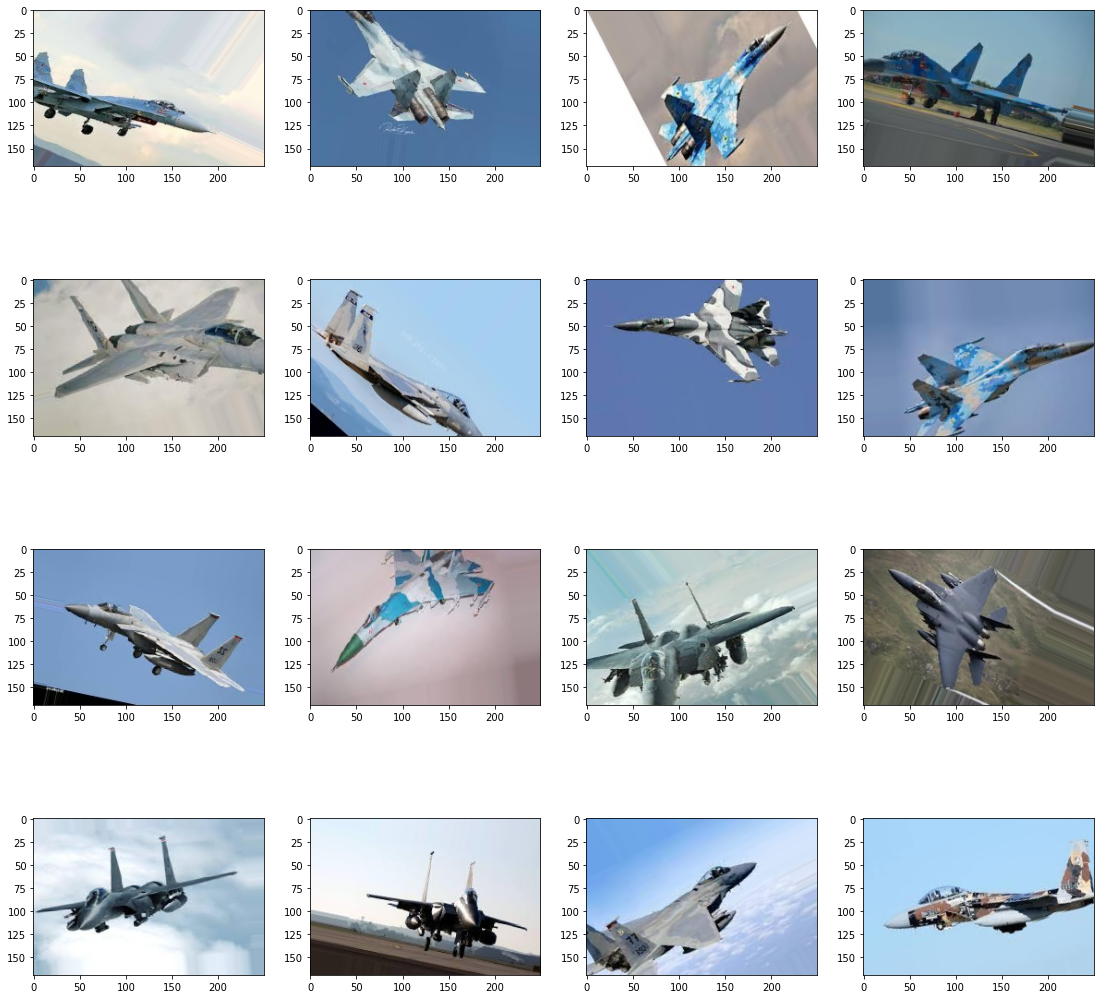

In [ ]:
plt.subplots(4,4, figsize=(19,19))
for index in range(16):
    img, label = train_generator.next()
    plt.subplot(4,4, index+1)
    plt.imshow(img[0])

In [ ]:
set_seed(0)

model = Sequential()
model.add( Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(170,250,3) )  )
model.add( MaxPooling2D(pool_size=(2,2)) )


model.add( Conv2D(32, (3, 3), activation='relu'))
model.add( MaxPooling2D(2, 2))


model.add( Flatten() )
model.add( Dense(128, activation="relu") )
model.add( Dense(1, activation="sigmoid") )

# kompilacja sieci
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

cp = ModelCheckpoint("aircraft-v3.h5", save_best_only=True, monitor="val_accuracy", verbose=0)

result = model.fit_generator(generator=train_generator, epochs=800,\
            validation_data=test_generator, callbacks=[cp], verbose=2)


2022-02-27 19:08:02.621065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 19:08:02.632040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 19:08:02.632987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 19:08:02.634808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-27 19:08:02.635667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

2022-02-27 19:08:03.922395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/800


2022-02-27 19:08:05.409975: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


4/4 - 5s - loss: 1.5788 - accuracy: 0.4694 - val_loss: 2.2575 - val_accuracy: 0.4800


Epoch 2/800


4/4 - 2s - loss: 1.1448 - accuracy: 0.5714 - val_loss: 0.8234 - val_accuracy: 0.4800


Epoch 3/800


4/4 - 1s - loss: 0.7316 - accuracy: 0.5306 - val_loss: 0.7002 - val_accuracy: 0.5200


Epoch 4/800


4/4 - 1s - loss: 0.6507 - accuracy: 0.5918 - val_loss: 0.8002 - val_accuracy: 0.4800


Epoch 5/800


4/4 - 1s - loss: 0.7137 - accuracy: 0.5714 - val_loss: 0.7756 - val_accuracy: 0.4800


Epoch 6/800


4/4 - 1s - loss: 0.7465 - accuracy: 0.4796 - val_loss: 0.6650 - val_accuracy: 0.5600


Epoch 7/800


4/4 - 1s - loss: 0.6985 - accuracy: 0.5102 - val_loss: 0.6745 - val_accuracy: 0.5600


Epoch 8/800


4/4 - 1s - loss: 0.6699 - accuracy: 0.6020 - val_loss: 0.6339 - val_accuracy: 0.6800


Epoch 9/800


4/4 - 1s - loss: 0.7586 - accuracy: 0.5714 - val_loss: 0.6781 - val_accuracy: 0.6400


Epoch 10/800


4/4 - 1s - loss: 0.6567 - accuracy: 0.6224 - val_loss: 0.6290 - val_accuracy: 0.7200


Epoch 11/800


4/4 - 1s - loss: 0.7004 - accuracy: 0.6327 - val_loss: 0.6294 - val_accuracy: 0.7600


Epoch 12/800


4/4 - 1s - loss: 0.6076 - accuracy: 0.7347 - val_loss: 0.5846 - val_accuracy: 0.7200


Epoch 13/800


4/4 - 1s - loss: 1.5247 - accuracy: 0.7041 - val_loss: 0.5506 - val_accuracy: 0.6000


Epoch 14/800


4/4 - 2s - loss: 0.5550 - accuracy: 0.7041 - val_loss: 1.2360 - val_accuracy: 0.4800


Epoch 15/800


4/4 - 1s - loss: 0.9045 - accuracy: 0.5306 - val_loss: 0.6061 - val_accuracy: 0.7600


Epoch 16/800


4/4 - 1s - loss: 0.5908 - accuracy: 0.6122 - val_loss: 0.5678 - val_accuracy: 0.7600


Epoch 17/800


4/4 - 1s - loss: 0.9118 - accuracy: 0.6327 - val_loss: 0.5756 - val_accuracy: 0.5600


Epoch 18/800


4/4 - 1s - loss: 0.7245 - accuracy: 0.6531 - val_loss: 0.6819 - val_accuracy: 0.5600


Epoch 19/800


4/4 - 1s - loss: 0.5647 - accuracy: 0.6837 - val_loss: 0.6837 - val_accuracy: 0.7200


Epoch 20/800


4/4 - 1s - loss: 0.5850 - accuracy: 0.6224 - val_loss: 0.5786 - val_accuracy: 0.7600


Epoch 21/800


4/4 - 1s - loss: 0.5304 - accuracy: 0.7449 - val_loss: 0.5633 - val_accuracy: 0.7200


Epoch 22/800


4/4 - 1s - loss: 0.5562 - accuracy: 0.7245 - val_loss: 0.6531 - val_accuracy: 0.7200


Epoch 23/800


4/4 - 1s - loss: 1.0355 - accuracy: 0.6327 - val_loss: 0.5026 - val_accuracy: 0.7600


Epoch 24/800


4/4 - 1s - loss: 0.5675 - accuracy: 0.7653 - val_loss: 0.7961 - val_accuracy: 0.5200


Epoch 25/800


4/4 - 1s - loss: 0.6702 - accuracy: 0.6633 - val_loss: 0.4886 - val_accuracy: 0.7200


Epoch 26/800


4/4 - 1s - loss: 0.5928 - accuracy: 0.6837 - val_loss: 0.5456 - val_accuracy: 0.8000


Epoch 27/800


4/4 - 1s - loss: 0.4893 - accuracy: 0.7959 - val_loss: 0.6763 - val_accuracy: 0.6400


Epoch 28/800


4/4 - 1s - loss: 0.5696 - accuracy: 0.7347 - val_loss: 0.7059 - val_accuracy: 0.6000


Epoch 29/800


4/4 - 1s - loss: 0.5897 - accuracy: 0.7551 - val_loss: 0.6079 - val_accuracy: 0.7200


Epoch 30/800


4/4 - 1s - loss: 0.4890 - accuracy: 0.7449 - val_loss: 0.5551 - val_accuracy: 0.7200


Epoch 31/800


4/4 - 1s - loss: 0.4660 - accuracy: 0.7653 - val_loss: 0.6019 - val_accuracy: 0.7600


Epoch 32/800


4/4 - 1s - loss: 0.5035 - accuracy: 0.7347 - val_loss: 0.4910 - val_accuracy: 0.7600


Epoch 33/800


4/4 - 1s - loss: 0.5269 - accuracy: 0.8061 - val_loss: 0.5376 - val_accuracy: 0.8000


Epoch 34/800


4/4 - 1s - loss: 0.4732 - accuracy: 0.7755 - val_loss: 0.4978 - val_accuracy: 0.7200


Epoch 35/800


4/4 - 1s - loss: 0.4434 - accuracy: 0.8163 - val_loss: 1.7869 - val_accuracy: 0.5600


Epoch 36/800


4/4 - 1s - loss: 0.9808 - accuracy: 0.5816 - val_loss: 0.4818 - val_accuracy: 0.7600


Epoch 37/800


4/4 - 1s - loss: 0.5106 - accuracy: 0.7755 - val_loss: 0.4409 - val_accuracy: 0.7600


Epoch 38/800


4/4 - 1s - loss: 0.5524 - accuracy: 0.7449 - val_loss: 0.4310 - val_accuracy: 0.7200


Epoch 39/800


4/4 - 1s - loss: 0.4739 - accuracy: 0.7755 - val_loss: 0.4524 - val_accuracy: 0.8000


Epoch 40/800


4/4 - 1s - loss: 0.4582 - accuracy: 0.7857 - val_loss: 0.4176 - val_accuracy: 0.8000


Epoch 41/800


4/4 - 1s - loss: 0.4270 - accuracy: 0.7755 - val_loss: 0.5388 - val_accuracy: 0.7600


Epoch 42/800


4/4 - 1s - loss: 0.6215 - accuracy: 0.7143 - val_loss: 0.4935 - val_accuracy: 0.7600


Epoch 43/800


4/4 - 1s - loss: 0.4943 - accuracy: 0.8163 - val_loss: 0.4912 - val_accuracy: 0.7200


Epoch 44/800


4/4 - 1s - loss: 0.4593 - accuracy: 0.7857 - val_loss: 0.4676 - val_accuracy: 0.7600


Epoch 45/800


4/4 - 1s - loss: 0.6434 - accuracy: 0.7551 - val_loss: 0.4945 - val_accuracy: 0.7600


Epoch 46/800


4/4 - 1s - loss: 0.4045 - accuracy: 0.8367 - val_loss: 0.4682 - val_accuracy: 0.7200


Epoch 47/800


4/4 - 1s - loss: 0.5418 - accuracy: 0.7041 - val_loss: 0.5948 - val_accuracy: 0.7200


Epoch 48/800


4/4 - 1s - loss: 0.4774 - accuracy: 0.7653 - val_loss: 0.5863 - val_accuracy: 0.6800


Epoch 49/800


4/4 - 1s - loss: 0.5028 - accuracy: 0.7449 - val_loss: 0.4762 - val_accuracy: 0.7600


Epoch 50/800


4/4 - 1s - loss: 0.4404 - accuracy: 0.7857 - val_loss: 0.6149 - val_accuracy: 0.7200


Epoch 51/800


4/4 - 1s - loss: 0.4318 - accuracy: 0.7755 - val_loss: 0.5539 - val_accuracy: 0.5600


Epoch 52/800


4/4 - 1s - loss: 0.4375 - accuracy: 0.7959 - val_loss: 0.4467 - val_accuracy: 0.8000


Epoch 53/800


4/4 - 1s - loss: 0.6898 - accuracy: 0.7449 - val_loss: 0.5675 - val_accuracy: 0.6800


Epoch 54/800


4/4 - 1s - loss: 0.5764 - accuracy: 0.7041 - val_loss: 0.4533 - val_accuracy: 0.8000


Epoch 55/800


4/4 - 1s - loss: 0.4242 - accuracy: 0.8469 - val_loss: 0.4192 - val_accuracy: 0.7600


Epoch 56/800


4/4 - 1s - loss: 0.4944 - accuracy: 0.7959 - val_loss: 0.4669 - val_accuracy: 0.8400


Epoch 57/800


4/4 - 1s - loss: 0.4181 - accuracy: 0.8061 - val_loss: 0.4185 - val_accuracy: 0.8000


Epoch 58/800


4/4 - 1s - loss: 0.4864 - accuracy: 0.7857 - val_loss: 0.4571 - val_accuracy: 0.8000


Epoch 59/800


4/4 - 1s - loss: 0.4532 - accuracy: 0.7857 - val_loss: 1.2007 - val_accuracy: 0.6400


Epoch 60/800


4/4 - 1s - loss: 0.7188 - accuracy: 0.6837 - val_loss: 0.4759 - val_accuracy: 0.7600


Epoch 61/800


4/4 - 1s - loss: 0.5461 - accuracy: 0.7449 - val_loss: 0.6423 - val_accuracy: 0.6800


Epoch 62/800


4/4 - 2s - loss: 0.4533 - accuracy: 0.7755 - val_loss: 0.4817 - val_accuracy: 0.6800


Epoch 63/800


4/4 - 2s - loss: 0.4221 - accuracy: 0.8265 - val_loss: 0.4340 - val_accuracy: 0.7200


Epoch 64/800


4/4 - 2s - loss: 0.4151 - accuracy: 0.7959 - val_loss: 0.4144 - val_accuracy: 0.7600


Epoch 65/800


4/4 - 1s - loss: 0.4641 - accuracy: 0.8265 - val_loss: 0.4859 - val_accuracy: 0.7200


Epoch 66/800


4/4 - 1s - loss: 0.4112 - accuracy: 0.7653 - val_loss: 0.4604 - val_accuracy: 0.8000


Epoch 67/800


4/4 - 1s - loss: 0.5493 - accuracy: 0.7245 - val_loss: 0.4062 - val_accuracy: 0.8000


Epoch 68/800


4/4 - 1s - loss: 0.4037 - accuracy: 0.8265 - val_loss: 0.4304 - val_accuracy: 0.8000


Epoch 69/800


4/4 - 1s - loss: 0.4393 - accuracy: 0.7959 - val_loss: 0.3914 - val_accuracy: 0.8000


Epoch 70/800


4/4 - 1s - loss: 0.5130 - accuracy: 0.7755 - val_loss: 0.4636 - val_accuracy: 0.7600


Epoch 71/800


4/4 - 1s - loss: 0.4086 - accuracy: 0.8469 - val_loss: 0.4040 - val_accuracy: 0.8000


Epoch 72/800


4/4 - 1s - loss: 0.4046 - accuracy: 0.8367 - val_loss: 0.4463 - val_accuracy: 0.8000


Epoch 73/800


4/4 - 1s - loss: 0.4300 - accuracy: 0.8163 - val_loss: 0.3335 - val_accuracy: 0.8400


Epoch 74/800


4/4 - 1s - loss: 0.4465 - accuracy: 0.7959 - val_loss: 0.5319 - val_accuracy: 0.7600


Epoch 75/800


4/4 - 1s - loss: 0.5091 - accuracy: 0.8265 - val_loss: 0.5312 - val_accuracy: 0.8000


Epoch 76/800


4/4 - 1s - loss: 0.4257 - accuracy: 0.8163 - val_loss: 0.5376 - val_accuracy: 0.7600


Epoch 77/800


4/4 - 1s - loss: 0.4090 - accuracy: 0.8061 - val_loss: 0.4029 - val_accuracy: 0.7600


Epoch 78/800


4/4 - 1s - loss: 0.6225 - accuracy: 0.6633 - val_loss: 0.5059 - val_accuracy: 0.7200


Epoch 79/800


4/4 - 1s - loss: 0.4367 - accuracy: 0.8061 - val_loss: 0.4702 - val_accuracy: 0.7200


Epoch 80/800


4/4 - 1s - loss: 0.3921 - accuracy: 0.8163 - val_loss: 0.4560 - val_accuracy: 0.7600


Epoch 81/800


4/4 - 1s - loss: 0.3747 - accuracy: 0.8061 - val_loss: 0.5381 - val_accuracy: 0.7200


Epoch 82/800


4/4 - 1s - loss: 0.3861 - accuracy: 0.8265 - val_loss: 0.4397 - val_accuracy: 0.8000


Epoch 83/800


4/4 - 1s - loss: 0.6193 - accuracy: 0.7347 - val_loss: 0.4710 - val_accuracy: 0.7600


Epoch 84/800


4/4 - 1s - loss: 0.3865 - accuracy: 0.8163 - val_loss: 0.4711 - val_accuracy: 0.7600


Epoch 85/800


4/4 - 1s - loss: 0.4362 - accuracy: 0.7959 - val_loss: 0.5595 - val_accuracy: 0.7200


Epoch 86/800


4/4 - 1s - loss: 0.4970 - accuracy: 0.7347 - val_loss: 0.4966 - val_accuracy: 0.7600


Epoch 87/800


4/4 - 1s - loss: 0.3865 - accuracy: 0.7857 - val_loss: 0.3741 - val_accuracy: 0.8400


Epoch 88/800


4/4 - 1s - loss: 0.3917 - accuracy: 0.8061 - val_loss: 0.3136 - val_accuracy: 0.8400


Epoch 89/800


4/4 - 1s - loss: 0.5800 - accuracy: 0.7551 - val_loss: 0.3826 - val_accuracy: 0.8000


Epoch 90/800


4/4 - 1s - loss: 0.3976 - accuracy: 0.7857 - val_loss: 0.3582 - val_accuracy: 0.8000


Epoch 91/800


4/4 - 1s - loss: 0.3639 - accuracy: 0.8061 - val_loss: 0.3711 - val_accuracy: 0.8000


Epoch 92/800


4/4 - 1s - loss: 0.3883 - accuracy: 0.7857 - val_loss: 0.7574 - val_accuracy: 0.7200


Epoch 93/800


4/4 - 1s - loss: 0.4203 - accuracy: 0.7755 - val_loss: 0.3874 - val_accuracy: 0.8000


Epoch 94/800


4/4 - 1s - loss: 0.3994 - accuracy: 0.8061 - val_loss: 0.4992 - val_accuracy: 0.7600


Epoch 95/800


4/4 - 1s - loss: 0.3351 - accuracy: 0.8061 - val_loss: 0.3878 - val_accuracy: 0.8000


Epoch 96/800


4/4 - 1s - loss: 0.4920 - accuracy: 0.7653 - val_loss: 0.3388 - val_accuracy: 0.8000


Epoch 97/800


4/4 - 1s - loss: 0.3635 - accuracy: 0.8367 - val_loss: 0.3466 - val_accuracy: 0.8000


Epoch 98/800


4/4 - 1s - loss: 0.4025 - accuracy: 0.8265 - val_loss: 0.3993 - val_accuracy: 0.7600


Epoch 99/800


4/4 - 1s - loss: 0.3969 - accuracy: 0.7857 - val_loss: 0.4151 - val_accuracy: 0.7600


Epoch 100/800


4/4 - 1s - loss: 0.4141 - accuracy: 0.8265 - val_loss: 0.5473 - val_accuracy: 0.7200


Epoch 101/800


4/4 - 1s - loss: 0.3950 - accuracy: 0.7653 - val_loss: 1.8570 - val_accuracy: 0.6400


Epoch 102/800


4/4 - 1s - loss: 0.7854 - accuracy: 0.8163 - val_loss: 0.3551 - val_accuracy: 0.8000


Epoch 103/800


4/4 - 1s - loss: 0.3617 - accuracy: 0.8571 - val_loss: 0.4670 - val_accuracy: 0.7200


Epoch 104/800


4/4 - 1s - loss: 0.3388 - accuracy: 0.8571 - val_loss: 0.3829 - val_accuracy: 0.7600


Epoch 105/800


4/4 - 1s - loss: 0.3905 - accuracy: 0.8367 - val_loss: 0.3249 - val_accuracy: 0.8000


Epoch 106/800


4/4 - 1s - loss: 0.5842 - accuracy: 0.7551 - val_loss: 0.4107 - val_accuracy: 0.7600


Epoch 107/800


4/4 - 1s - loss: 0.4294 - accuracy: 0.7959 - val_loss: 0.4478 - val_accuracy: 0.7200


Epoch 108/800


4/4 - 1s - loss: 0.4774 - accuracy: 0.7857 - val_loss: 0.4131 - val_accuracy: 0.7600


Epoch 109/800


4/4 - 1s - loss: 0.4316 - accuracy: 0.7959 - val_loss: 0.4012 - val_accuracy: 0.8000


Epoch 110/800


4/4 - 1s - loss: 0.5661 - accuracy: 0.7551 - val_loss: 0.3746 - val_accuracy: 0.7600


Epoch 111/800


4/4 - 1s - loss: 0.3229 - accuracy: 0.8367 - val_loss: 0.3418 - val_accuracy: 0.7600


Epoch 112/800


4/4 - 1s - loss: 0.3524 - accuracy: 0.8265 - val_loss: 0.3737 - val_accuracy: 0.7600


Epoch 113/800


4/4 - 1s - loss: 0.4031 - accuracy: 0.8163 - val_loss: 0.4502 - val_accuracy: 0.7600


Epoch 114/800


4/4 - 2s - loss: 0.3486 - accuracy: 0.8265 - val_loss: 0.6403 - val_accuracy: 0.7600


Epoch 115/800


4/4 - 2s - loss: 0.5231 - accuracy: 0.7755 - val_loss: 0.4304 - val_accuracy: 0.7600


Epoch 116/800


4/4 - 2s - loss: 0.3944 - accuracy: 0.8878 - val_loss: 0.5198 - val_accuracy: 0.7600


Epoch 117/800


4/4 - 2s - loss: 0.3522 - accuracy: 0.8265 - val_loss: 0.5035 - val_accuracy: 0.7600


Epoch 118/800


4/4 - 1s - loss: 0.4583 - accuracy: 0.7959 - val_loss: 0.3793 - val_accuracy: 0.8000


Epoch 119/800


4/4 - 1s - loss: 0.4331 - accuracy: 0.8265 - val_loss: 0.3827 - val_accuracy: 0.8000


Epoch 120/800


4/4 - 1s - loss: 0.3394 - accuracy: 0.8367 - val_loss: 0.3852 - val_accuracy: 0.7600


Epoch 121/800


4/4 - 1s - loss: 0.3694 - accuracy: 0.8469 - val_loss: 0.3562 - val_accuracy: 0.7600


Epoch 122/800


4/4 - 1s - loss: 0.4728 - accuracy: 0.7959 - val_loss: 0.3280 - val_accuracy: 0.8000


Epoch 123/800


4/4 - 1s - loss: 0.3163 - accuracy: 0.8673 - val_loss: 0.5781 - val_accuracy: 0.7200


Epoch 124/800


4/4 - 1s - loss: 0.3471 - accuracy: 0.8163 - val_loss: 0.5563 - val_accuracy: 0.8400


Epoch 125/800


4/4 - 1s - loss: 0.3962 - accuracy: 0.8776 - val_loss: 1.1592 - val_accuracy: 0.6800


Epoch 126/800


4/4 - 1s - loss: 0.7403 - accuracy: 0.6837 - val_loss: 0.4339 - val_accuracy: 0.7200


Epoch 127/800


4/4 - 1s - loss: 0.3604 - accuracy: 0.8469 - val_loss: 0.4686 - val_accuracy: 0.7200


Epoch 128/800


4/4 - 1s - loss: 0.3574 - accuracy: 0.8265 - val_loss: 0.3813 - val_accuracy: 0.7200


Epoch 129/800


4/4 - 1s - loss: 0.4288 - accuracy: 0.7755 - val_loss: 0.4096 - val_accuracy: 0.7600


Epoch 130/800


4/4 - 1s - loss: 0.2878 - accuracy: 0.8469 - val_loss: 0.3783 - val_accuracy: 0.8800


Epoch 131/800


4/4 - 1s - loss: 0.3817 - accuracy: 0.8367 - val_loss: 0.3241 - val_accuracy: 0.8400


Epoch 132/800


4/4 - 1s - loss: 1.0155 - accuracy: 0.7347 - val_loss: 0.3367 - val_accuracy: 0.8000


Epoch 133/800


4/4 - 1s - loss: 0.3965 - accuracy: 0.7959 - val_loss: 0.3245 - val_accuracy: 0.7600


Epoch 134/800


4/4 - 1s - loss: 0.3058 - accuracy: 0.8469 - val_loss: 0.3174 - val_accuracy: 0.8400


Epoch 135/800


4/4 - 1s - loss: 0.4960 - accuracy: 0.8163 - val_loss: 0.3347 - val_accuracy: 0.8800


Epoch 136/800


4/4 - 1s - loss: 0.3065 - accuracy: 0.8571 - val_loss: 0.3952 - val_accuracy: 0.7200


Epoch 137/800


4/4 - 1s - loss: 0.3679 - accuracy: 0.8367 - val_loss: 0.5837 - val_accuracy: 0.7200


Epoch 138/800


4/4 - 1s - loss: 0.3495 - accuracy: 0.8673 - val_loss: 0.2876 - val_accuracy: 0.8800


Epoch 139/800


4/4 - 1s - loss: 0.4180 - accuracy: 0.7959 - val_loss: 0.3966 - val_accuracy: 0.7600


Epoch 140/800


4/4 - 1s - loss: 0.3745 - accuracy: 0.8367 - val_loss: 0.2802 - val_accuracy: 0.8400


Epoch 141/800


4/4 - 1s - loss: 0.3751 - accuracy: 0.8163 - val_loss: 0.3560 - val_accuracy: 0.9200


Epoch 142/800


4/4 - 1s - loss: 0.2879 - accuracy: 0.8469 - val_loss: 0.4191 - val_accuracy: 0.8400


Epoch 143/800


4/4 - 1s - loss: 0.3538 - accuracy: 0.8367 - val_loss: 0.2879 - val_accuracy: 0.9200


Epoch 144/800


4/4 - 1s - loss: 0.4998 - accuracy: 0.8061 - val_loss: 0.3315 - val_accuracy: 0.9200


Epoch 145/800


4/4 - 1s - loss: 0.3033 - accuracy: 0.8469 - val_loss: 0.2681 - val_accuracy: 0.8800


Epoch 146/800


4/4 - 1s - loss: 0.3676 - accuracy: 0.8673 - val_loss: 0.2189 - val_accuracy: 0.9600


Epoch 147/800


4/4 - 1s - loss: 0.3963 - accuracy: 0.7857 - val_loss: 0.5051 - val_accuracy: 0.7200


Epoch 148/800


4/4 - 1s - loss: 0.3301 - accuracy: 0.8673 - val_loss: 0.3057 - val_accuracy: 0.9200


Epoch 149/800


4/4 - 1s - loss: 0.2721 - accuracy: 0.8469 - val_loss: 0.6186 - val_accuracy: 0.6800


Epoch 150/800


4/4 - 1s - loss: 0.3573 - accuracy: 0.8571 - val_loss: 0.2512 - val_accuracy: 0.9200


Epoch 151/800


4/4 - 1s - loss: 0.6594 - accuracy: 0.7959 - val_loss: 0.4086 - val_accuracy: 0.8000


Epoch 152/800


4/4 - 1s - loss: 0.4585 - accuracy: 0.7755 - val_loss: 0.4699 - val_accuracy: 0.8800


Epoch 153/800


4/4 - 1s - loss: 0.6102 - accuracy: 0.7245 - val_loss: 0.3669 - val_accuracy: 0.8800


Epoch 154/800


4/4 - 1s - loss: 0.3823 - accuracy: 0.8265 - val_loss: 0.9836 - val_accuracy: 0.7600


Epoch 155/800


4/4 - 1s - loss: 0.5965 - accuracy: 0.6939 - val_loss: 0.3786 - val_accuracy: 0.8800


Epoch 156/800


4/4 - 1s - loss: 0.3658 - accuracy: 0.8878 - val_loss: 0.3392 - val_accuracy: 0.8800


Epoch 157/800


4/4 - 1s - loss: 0.5751 - accuracy: 0.7653 - val_loss: 0.3957 - val_accuracy: 0.8400


Epoch 158/800


4/4 - 1s - loss: 0.2956 - accuracy: 0.8776 - val_loss: 0.3622 - val_accuracy: 0.8800


Epoch 159/800


4/4 - 1s - loss: 0.4763 - accuracy: 0.7755 - val_loss: 0.3042 - val_accuracy: 0.8800


Epoch 160/800


4/4 - 1s - loss: 0.3009 - accuracy: 0.8776 - val_loss: 0.3583 - val_accuracy: 0.8800


Epoch 161/800


4/4 - 1s - loss: 0.3405 - accuracy: 0.8367 - val_loss: 0.3513 - val_accuracy: 0.8800


Epoch 162/800


4/4 - 1s - loss: 0.4054 - accuracy: 0.8367 - val_loss: 0.3594 - val_accuracy: 0.8000


Epoch 163/800


4/4 - 1s - loss: 0.3484 - accuracy: 0.8673 - val_loss: 0.3264 - val_accuracy: 0.9200


Epoch 164/800


4/4 - 1s - loss: 0.2999 - accuracy: 0.8673 - val_loss: 0.3533 - val_accuracy: 0.8000


Epoch 165/800


4/4 - 2s - loss: 0.3131 - accuracy: 0.8367 - val_loss: 0.2650 - val_accuracy: 0.9200


Epoch 166/800


4/4 - 2s - loss: 0.4065 - accuracy: 0.7857 - val_loss: 0.3897 - val_accuracy: 0.8400


Epoch 167/800


4/4 - 2s - loss: 0.3935 - accuracy: 0.7857 - val_loss: 0.3921 - val_accuracy: 0.8400


Epoch 168/800


4/4 - 2s - loss: 0.3836 - accuracy: 0.7857 - val_loss: 0.3409 - val_accuracy: 0.8800


Epoch 169/800


4/4 - 1s - loss: 0.3452 - accuracy: 0.8776 - val_loss: 0.2716 - val_accuracy: 0.9200


Epoch 170/800


4/4 - 1s - loss: 0.3336 - accuracy: 0.8673 - val_loss: 0.2642 - val_accuracy: 0.9200


Epoch 171/800


4/4 - 1s - loss: 0.2904 - accuracy: 0.8673 - val_loss: 0.2726 - val_accuracy: 0.8400


Epoch 172/800


4/4 - 1s - loss: 0.2662 - accuracy: 0.8878 - val_loss: 0.2645 - val_accuracy: 0.9200


Epoch 173/800


4/4 - 1s - loss: 0.4546 - accuracy: 0.7857 - val_loss: 0.4392 - val_accuracy: 0.8000


Epoch 174/800


4/4 - 1s - loss: 0.6192 - accuracy: 0.8265 - val_loss: 0.3254 - val_accuracy: 0.8000


Epoch 175/800


4/4 - 1s - loss: 0.3683 - accuracy: 0.8163 - val_loss: 0.4253 - val_accuracy: 0.8000


Epoch 176/800


4/4 - 1s - loss: 0.2334 - accuracy: 0.9184 - val_loss: 0.3973 - val_accuracy: 0.8400


Epoch 177/800


4/4 - 1s - loss: 0.4793 - accuracy: 0.8163 - val_loss: 0.4814 - val_accuracy: 0.7600


Epoch 178/800


4/4 - 1s - loss: 0.6530 - accuracy: 0.7347 - val_loss: 0.5600 - val_accuracy: 0.6800


Epoch 179/800


4/4 - 1s - loss: 0.5966 - accuracy: 0.7143 - val_loss: 0.6476 - val_accuracy: 0.6800


Epoch 180/800


4/4 - 1s - loss: 0.9460 - accuracy: 0.8061 - val_loss: 0.7735 - val_accuracy: 0.8800


Epoch 181/800


4/4 - 1s - loss: 0.5033 - accuracy: 0.7653 - val_loss: 0.5625 - val_accuracy: 0.8400


Epoch 182/800


4/4 - 1s - loss: 0.4617 - accuracy: 0.7143 - val_loss: 0.7016 - val_accuracy: 0.7200


Epoch 183/800


4/4 - 1s - loss: 0.4145 - accuracy: 0.7755 - val_loss: 0.6731 - val_accuracy: 0.7600


Epoch 184/800


4/4 - 1s - loss: 0.4018 - accuracy: 0.7653 - val_loss: 0.6661 - val_accuracy: 0.7200


Epoch 185/800


4/4 - 1s - loss: 0.5099 - accuracy: 0.7857 - val_loss: 0.5603 - val_accuracy: 0.8000


Epoch 186/800


4/4 - 1s - loss: 0.4232 - accuracy: 0.7959 - val_loss: 0.4000 - val_accuracy: 0.8000


Epoch 187/800


4/4 - 1s - loss: 0.5668 - accuracy: 0.8469 - val_loss: 0.4165 - val_accuracy: 0.8400


Epoch 188/800


4/4 - 1s - loss: 0.4087 - accuracy: 0.8163 - val_loss: 0.3488 - val_accuracy: 0.8400


Epoch 189/800


4/4 - 1s - loss: 0.3097 - accuracy: 0.8469 - val_loss: 0.3244 - val_accuracy: 0.8800


Epoch 190/800


4/4 - 1s - loss: 0.6386 - accuracy: 0.7857 - val_loss: 0.4300 - val_accuracy: 0.8000


Epoch 191/800


4/4 - 1s - loss: 0.4338 - accuracy: 0.8367 - val_loss: 0.3326 - val_accuracy: 0.8800


Epoch 192/800


4/4 - 1s - loss: 0.3860 - accuracy: 0.8776 - val_loss: 0.2952 - val_accuracy: 0.8400


Epoch 193/800


4/4 - 1s - loss: 0.3538 - accuracy: 0.8163 - val_loss: 0.2896 - val_accuracy: 0.9200


Epoch 194/800


4/4 - 1s - loss: 0.3283 - accuracy: 0.8469 - val_loss: 0.3246 - val_accuracy: 0.8800


Epoch 195/800


4/4 - 1s - loss: 0.4411 - accuracy: 0.8163 - val_loss: 0.3550 - val_accuracy: 0.9200


Epoch 196/800


4/4 - 1s - loss: 0.3874 - accuracy: 0.7653 - val_loss: 0.2522 - val_accuracy: 0.9600


Epoch 197/800


4/4 - 1s - loss: 0.3394 - accuracy: 0.8367 - val_loss: 0.3709 - val_accuracy: 0.8000


Epoch 198/800


4/4 - 1s - loss: 0.2757 - accuracy: 0.8980 - val_loss: 1.3011 - val_accuracy: 0.6800


Epoch 199/800


4/4 - 1s - loss: 0.8388 - accuracy: 0.6939 - val_loss: 0.3866 - val_accuracy: 0.7600


Epoch 200/800


4/4 - 1s - loss: 0.2899 - accuracy: 0.8571 - val_loss: 0.3126 - val_accuracy: 0.8800


Epoch 201/800


4/4 - 1s - loss: 0.3314 - accuracy: 0.8469 - val_loss: 0.3572 - val_accuracy: 0.8800


Epoch 202/800


4/4 - 1s - loss: 0.3682 - accuracy: 0.8571 - val_loss: 0.3267 - val_accuracy: 0.8800


Epoch 203/800


4/4 - 1s - loss: 0.3290 - accuracy: 0.8469 - val_loss: 0.2400 - val_accuracy: 0.9200


Epoch 204/800


4/4 - 1s - loss: 0.2830 - accuracy: 0.8776 - val_loss: 0.2264 - val_accuracy: 0.9200


Epoch 205/800


4/4 - 1s - loss: 0.2737 - accuracy: 0.8878 - val_loss: 0.2455 - val_accuracy: 0.9600


Epoch 206/800


4/4 - 1s - loss: 0.2961 - accuracy: 0.8571 - val_loss: 0.5436 - val_accuracy: 0.7600


Epoch 207/800


4/4 - 1s - loss: 0.8326 - accuracy: 0.6837 - val_loss: 0.2634 - val_accuracy: 0.9600


Epoch 208/800


4/4 - 1s - loss: 0.3125 - accuracy: 0.8571 - val_loss: 0.2971 - val_accuracy: 0.8800


Epoch 209/800


4/4 - 1s - loss: 0.3472 - accuracy: 0.8469 - val_loss: 0.2466 - val_accuracy: 0.9200


Epoch 210/800


4/4 - 1s - loss: 0.2772 - accuracy: 0.8673 - val_loss: 0.4415 - val_accuracy: 0.8000


Epoch 211/800


4/4 - 1s - loss: 0.2675 - accuracy: 0.8571 - val_loss: 0.5169 - val_accuracy: 0.7600


Epoch 212/800


4/4 - 1s - loss: 0.3496 - accuracy: 0.8673 - val_loss: 0.2734 - val_accuracy: 0.9200


Epoch 213/800


4/4 - 1s - loss: 0.2795 - accuracy: 0.8469 - val_loss: 0.2947 - val_accuracy: 0.9200


Epoch 214/800


4/4 - 1s - loss: 0.3271 - accuracy: 0.8571 - val_loss: 0.3139 - val_accuracy: 0.9200


Epoch 215/800


4/4 - 1s - loss: 0.3264 - accuracy: 0.8367 - val_loss: 0.4929 - val_accuracy: 0.7200


Epoch 216/800


4/4 - 1s - loss: 0.2376 - accuracy: 0.8776 - val_loss: 0.3019 - val_accuracy: 0.8400


Epoch 217/800


4/4 - 1s - loss: 0.3955 - accuracy: 0.8367 - val_loss: 0.3052 - val_accuracy: 0.8800


Epoch 218/800


4/4 - 2s - loss: 0.3312 - accuracy: 0.8265 - val_loss: 0.4003 - val_accuracy: 0.8400


Epoch 219/800


4/4 - 2s - loss: 0.3099 - accuracy: 0.8367 - val_loss: 1.0729 - val_accuracy: 0.6800


Epoch 220/800


4/4 - 2s - loss: 0.4520 - accuracy: 0.8469 - val_loss: 0.3496 - val_accuracy: 0.8000


Epoch 221/800


4/4 - 2s - loss: 0.3021 - accuracy: 0.8571 - val_loss: 0.2629 - val_accuracy: 0.8400


Epoch 222/800


4/4 - 1s - loss: 0.2988 - accuracy: 0.8571 - val_loss: 0.2650 - val_accuracy: 0.9200


Epoch 223/800


4/4 - 1s - loss: 0.2634 - accuracy: 0.8673 - val_loss: 0.2830 - val_accuracy: 0.8400


Epoch 224/800


4/4 - 1s - loss: 0.2746 - accuracy: 0.8776 - val_loss: 0.2128 - val_accuracy: 0.9600


Epoch 225/800


4/4 - 1s - loss: 0.3955 - accuracy: 0.7959 - val_loss: 0.2729 - val_accuracy: 0.8800


Epoch 226/800


4/4 - 1s - loss: 0.3201 - accuracy: 0.8061 - val_loss: 0.5949 - val_accuracy: 0.7200


Epoch 227/800


4/4 - 1s - loss: 0.3963 - accuracy: 0.8061 - val_loss: 0.2819 - val_accuracy: 0.9200


Epoch 228/800


4/4 - 1s - loss: 0.2890 - accuracy: 0.8673 - val_loss: 0.2409 - val_accuracy: 0.9200


Epoch 229/800


4/4 - 1s - loss: 0.4453 - accuracy: 0.8571 - val_loss: 0.3288 - val_accuracy: 0.8400


Epoch 230/800


4/4 - 1s - loss: 0.3019 - accuracy: 0.8571 - val_loss: 0.2830 - val_accuracy: 0.8800


Epoch 231/800


4/4 - 1s - loss: 0.2888 - accuracy: 0.8571 - val_loss: 0.2940 - val_accuracy: 0.8400


Epoch 232/800


4/4 - 1s - loss: 0.3018 - accuracy: 0.8673 - val_loss: 0.3409 - val_accuracy: 0.8000


Epoch 233/800


4/4 - 1s - loss: 0.4051 - accuracy: 0.8265 - val_loss: 0.2638 - val_accuracy: 0.9600


Epoch 234/800


4/4 - 1s - loss: 0.2782 - accuracy: 0.8673 - val_loss: 1.3895 - val_accuracy: 0.6800


Epoch 235/800


4/4 - 1s - loss: 0.6413 - accuracy: 0.7959 - val_loss: 0.2526 - val_accuracy: 0.8800


Epoch 236/800


4/4 - 1s - loss: 0.4068 - accuracy: 0.8571 - val_loss: 0.2592 - val_accuracy: 0.8800


Epoch 237/800


4/4 - 1s - loss: 0.3662 - accuracy: 0.8265 - val_loss: 0.3337 - val_accuracy: 0.7600


Epoch 238/800


4/4 - 1s - loss: 0.2610 - accuracy: 0.8776 - val_loss: 0.3724 - val_accuracy: 0.8400


Epoch 239/800


4/4 - 1s - loss: 0.4153 - accuracy: 0.8673 - val_loss: 0.2396 - val_accuracy: 0.9200


Epoch 240/800


4/4 - 1s - loss: 0.2678 - accuracy: 0.8367 - val_loss: 0.1973 - val_accuracy: 0.8800


Epoch 241/800


4/4 - 1s - loss: 0.4309 - accuracy: 0.8163 - val_loss: 0.2292 - val_accuracy: 0.9200


Epoch 242/800


4/4 - 1s - loss: 0.2716 - accuracy: 0.8571 - val_loss: 0.2918 - val_accuracy: 0.8400


Epoch 243/800


4/4 - 1s - loss: 0.2538 - accuracy: 0.9082 - val_loss: 0.2974 - val_accuracy: 0.8800


Epoch 244/800


4/4 - 1s - loss: 0.4496 - accuracy: 0.8061 - val_loss: 0.5963 - val_accuracy: 0.7600


Epoch 245/800


4/4 - 1s - loss: 0.3206 - accuracy: 0.8673 - val_loss: 0.4595 - val_accuracy: 0.7200


Epoch 246/800


4/4 - 1s - loss: 0.3464 - accuracy: 0.8367 - val_loss: 0.3001 - val_accuracy: 0.8000


Epoch 247/800


4/4 - 1s - loss: 0.2667 - accuracy: 0.8776 - val_loss: 0.2463 - val_accuracy: 0.8800


Epoch 248/800


4/4 - 1s - loss: 0.2652 - accuracy: 0.8776 - val_loss: 0.3207 - val_accuracy: 0.8400


Epoch 249/800


4/4 - 1s - loss: 0.3478 - accuracy: 0.8469 - val_loss: 0.2517 - val_accuracy: 0.9600


Epoch 250/800


4/4 - 1s - loss: 0.4658 - accuracy: 0.7857 - val_loss: 0.3084 - val_accuracy: 0.8400


Epoch 251/800


4/4 - 1s - loss: 0.2185 - accuracy: 0.9184 - val_loss: 0.2817 - val_accuracy: 0.9200


Epoch 252/800


4/4 - 1s - loss: 0.3818 - accuracy: 0.8571 - val_loss: 0.2206 - val_accuracy: 0.9600


Epoch 253/800


4/4 - 1s - loss: 0.2952 - accuracy: 0.8673 - val_loss: 0.2253 - val_accuracy: 0.8800


Epoch 254/800


4/4 - 1s - loss: 0.2871 - accuracy: 0.8469 - val_loss: 0.3573 - val_accuracy: 0.8400


Epoch 255/800


4/4 - 1s - loss: 0.3811 - accuracy: 0.8265 - val_loss: 0.3186 - val_accuracy: 0.8400


Epoch 256/800


4/4 - 1s - loss: 0.2919 - accuracy: 0.8367 - val_loss: 0.3849 - val_accuracy: 0.8000


Epoch 257/800


4/4 - 1s - loss: 0.2803 - accuracy: 0.8776 - val_loss: 0.3298 - val_accuracy: 0.8400


Epoch 258/800


4/4 - 1s - loss: 0.3459 - accuracy: 0.8367 - val_loss: 0.3963 - val_accuracy: 0.8000


Epoch 259/800


4/4 - 1s - loss: 0.5954 - accuracy: 0.8571 - val_loss: 0.4072 - val_accuracy: 0.8000


Epoch 260/800


4/4 - 1s - loss: 0.2899 - accuracy: 0.8265 - val_loss: 0.2432 - val_accuracy: 0.8400


Epoch 261/800


4/4 - 1s - loss: 0.2648 - accuracy: 0.8571 - val_loss: 0.4932 - val_accuracy: 0.7600


Epoch 262/800


4/4 - 1s - loss: 0.3294 - accuracy: 0.8571 - val_loss: 0.2846 - val_accuracy: 0.9200


Epoch 263/800


4/4 - 1s - loss: 0.2780 - accuracy: 0.8571 - val_loss: 0.2106 - val_accuracy: 0.9600


Epoch 264/800


4/4 - 1s - loss: 0.3077 - accuracy: 0.8673 - val_loss: 0.3305 - val_accuracy: 0.8800


Epoch 265/800


4/4 - 1s - loss: 0.2545 - accuracy: 0.8571 - val_loss: 0.2686 - val_accuracy: 0.8800


Epoch 266/800


4/4 - 1s - loss: 0.5246 - accuracy: 0.7755 - val_loss: 0.2592 - val_accuracy: 0.8400


Epoch 267/800


4/4 - 1s - loss: 0.2370 - accuracy: 0.9082 - val_loss: 0.2082 - val_accuracy: 0.9600


Epoch 268/800


4/4 - 1s - loss: 0.2864 - accuracy: 0.8878 - val_loss: 0.2030 - val_accuracy: 0.9600


Epoch 269/800


4/4 - 1s - loss: 0.2461 - accuracy: 0.8878 - val_loss: 0.2311 - val_accuracy: 0.8400


Epoch 270/800


4/4 - 1s - loss: 0.2596 - accuracy: 0.8980 - val_loss: 0.1963 - val_accuracy: 0.9200


Epoch 271/800


4/4 - 1s - loss: 0.3995 - accuracy: 0.8367 - val_loss: 0.2823 - val_accuracy: 0.8400


Epoch 272/800


4/4 - 2s - loss: 0.3110 - accuracy: 0.8571 - val_loss: 0.2566 - val_accuracy: 0.9200


Epoch 273/800


4/4 - 2s - loss: 0.7230 - accuracy: 0.8776 - val_loss: 0.2288 - val_accuracy: 0.9200


Epoch 274/800


4/4 - 2s - loss: 0.2796 - accuracy: 0.8673 - val_loss: 0.3161 - val_accuracy: 0.8800


Epoch 275/800


4/4 - 2s - loss: 0.2934 - accuracy: 0.9082 - val_loss: 0.2498 - val_accuracy: 0.8800


Epoch 276/800


4/4 - 1s - loss: 0.2604 - accuracy: 0.8469 - val_loss: 0.2117 - val_accuracy: 0.9200


Epoch 277/800


4/4 - 1s - loss: 0.2991 - accuracy: 0.8776 - val_loss: 0.6313 - val_accuracy: 0.6800


Epoch 278/800


4/4 - 1s - loss: 0.3678 - accuracy: 0.8265 - val_loss: 0.3799 - val_accuracy: 0.8000


Epoch 279/800


4/4 - 1s - loss: 0.3334 - accuracy: 0.8265 - val_loss: 0.3924 - val_accuracy: 0.8000


Epoch 280/800


4/4 - 1s - loss: 0.2534 - accuracy: 0.8776 - val_loss: 0.2615 - val_accuracy: 0.8800


Epoch 281/800


4/4 - 1s - loss: 0.2607 - accuracy: 0.8776 - val_loss: 0.2245 - val_accuracy: 0.8800


Epoch 282/800


4/4 - 1s - loss: 0.2117 - accuracy: 0.8980 - val_loss: 0.3291 - val_accuracy: 0.8400


Epoch 283/800


4/4 - 1s - loss: 0.2885 - accuracy: 0.8776 - val_loss: 0.3283 - val_accuracy: 0.8400


Epoch 284/800


4/4 - 1s - loss: 0.2279 - accuracy: 0.8878 - val_loss: 0.2232 - val_accuracy: 0.8800


Epoch 285/800


4/4 - 1s - loss: 0.4583 - accuracy: 0.8367 - val_loss: 0.4775 - val_accuracy: 0.7600


Epoch 286/800


4/4 - 1s - loss: 0.3112 - accuracy: 0.9082 - val_loss: 0.2542 - val_accuracy: 0.8800


Epoch 287/800


4/4 - 1s - loss: 0.5121 - accuracy: 0.8878 - val_loss: 0.3337 - val_accuracy: 0.8000


Epoch 288/800


4/4 - 1s - loss: 0.3072 - accuracy: 0.8776 - val_loss: 0.2404 - val_accuracy: 0.9200


Epoch 289/800


4/4 - 1s - loss: 0.3082 - accuracy: 0.8571 - val_loss: 0.4146 - val_accuracy: 0.8400


Epoch 290/800


4/4 - 1s - loss: 0.2070 - accuracy: 0.8980 - val_loss: 0.2313 - val_accuracy: 0.9200


Epoch 291/800


4/4 - 1s - loss: 0.4648 - accuracy: 0.8673 - val_loss: 0.2141 - val_accuracy: 0.9200


Epoch 292/800


4/4 - 1s - loss: 0.2383 - accuracy: 0.8776 - val_loss: 0.5688 - val_accuracy: 0.8800


Epoch 293/800


4/4 - 1s - loss: 0.5732 - accuracy: 0.7449 - val_loss: 0.2082 - val_accuracy: 0.9200


Epoch 294/800


4/4 - 1s - loss: 0.3377 - accuracy: 0.8367 - val_loss: 0.2095 - val_accuracy: 0.8800


Epoch 295/800


4/4 - 1s - loss: 0.3745 - accuracy: 0.8367 - val_loss: 0.2741 - val_accuracy: 0.8400


Epoch 296/800


4/4 - 1s - loss: 0.2274 - accuracy: 0.9082 - val_loss: 0.2042 - val_accuracy: 0.9200


Epoch 297/800


4/4 - 1s - loss: 0.2290 - accuracy: 0.8980 - val_loss: 0.2521 - val_accuracy: 0.8800


Epoch 298/800


4/4 - 1s - loss: 0.4784 - accuracy: 0.8367 - val_loss: 0.1639 - val_accuracy: 0.9200


Epoch 299/800


4/4 - 1s - loss: 0.3208 - accuracy: 0.8367 - val_loss: 0.2113 - val_accuracy: 0.9200


Epoch 300/800


4/4 - 1s - loss: 0.3635 - accuracy: 0.8776 - val_loss: 0.2451 - val_accuracy: 0.9200


Epoch 301/800


4/4 - 1s - loss: 0.2598 - accuracy: 0.8878 - val_loss: 0.2356 - val_accuracy: 0.9200


Epoch 302/800


4/4 - 1s - loss: 0.2124 - accuracy: 0.9082 - val_loss: 0.1488 - val_accuracy: 0.9600


Epoch 303/800


4/4 - 1s - loss: 0.2090 - accuracy: 0.8878 - val_loss: 0.2918 - val_accuracy: 0.8800


Epoch 304/800


4/4 - 1s - loss: 0.3740 - accuracy: 0.8571 - val_loss: 0.2819 - val_accuracy: 0.8800


Epoch 305/800


4/4 - 1s - loss: 0.2752 - accuracy: 0.9082 - val_loss: 0.1943 - val_accuracy: 0.8800


Epoch 306/800


4/4 - 1s - loss: 0.2932 - accuracy: 0.7959 - val_loss: 0.2024 - val_accuracy: 0.9200


Epoch 307/800


4/4 - 1s - loss: 0.2240 - accuracy: 0.8980 - val_loss: 0.2212 - val_accuracy: 0.9200


Epoch 308/800


4/4 - 1s - loss: 0.2881 - accuracy: 0.8571 - val_loss: 0.2437 - val_accuracy: 0.8800


Epoch 309/800


4/4 - 1s - loss: 0.2461 - accuracy: 0.8776 - val_loss: 0.2586 - val_accuracy: 0.9200


Epoch 310/800


4/4 - 1s - loss: 0.2230 - accuracy: 0.9184 - val_loss: 0.1822 - val_accuracy: 0.9600


Epoch 311/800


4/4 - 1s - loss: 0.2537 - accuracy: 0.8776 - val_loss: 0.2387 - val_accuracy: 0.9200


Epoch 312/800


4/4 - 1s - loss: 0.5466 - accuracy: 0.8061 - val_loss: 0.2558 - val_accuracy: 0.9200


Epoch 313/800


4/4 - 1s - loss: 0.3781 - accuracy: 0.8163 - val_loss: 0.2297 - val_accuracy: 0.9200


Epoch 314/800


4/4 - 1s - loss: 0.2495 - accuracy: 0.8878 - val_loss: 0.1995 - val_accuracy: 0.9600


Epoch 315/800


4/4 - 1s - loss: 0.4509 - accuracy: 0.8163 - val_loss: 0.2780 - val_accuracy: 0.8400


Epoch 316/800


4/4 - 1s - loss: 0.3823 - accuracy: 0.8571 - val_loss: 0.2065 - val_accuracy: 0.9600


Epoch 317/800


4/4 - 1s - loss: 0.3658 - accuracy: 0.8163 - val_loss: 0.2117 - val_accuracy: 0.9600


Epoch 318/800


4/4 - 1s - loss: 0.2635 - accuracy: 0.8469 - val_loss: 0.1989 - val_accuracy: 0.9200


Epoch 319/800


4/4 - 1s - loss: 0.2469 - accuracy: 0.8878 - val_loss: 0.1520 - val_accuracy: 0.9200


Epoch 320/800


4/4 - 1s - loss: 0.2766 - accuracy: 0.8980 - val_loss: 0.2502 - val_accuracy: 0.8800


Epoch 321/800


4/4 - 1s - loss: 0.2338 - accuracy: 0.8878 - val_loss: 0.2635 - val_accuracy: 0.9200


Epoch 322/800


4/4 - 1s - loss: 0.3599 - accuracy: 0.7857 - val_loss: 0.4229 - val_accuracy: 0.8000


Epoch 323/800


4/4 - 1s - loss: 0.2188 - accuracy: 0.8776 - val_loss: 0.1545 - val_accuracy: 0.9600


Epoch 324/800


4/4 - 1s - loss: 0.3155 - accuracy: 0.8265 - val_loss: 0.4407 - val_accuracy: 0.8000


Epoch 325/800


4/4 - 2s - loss: 0.2936 - accuracy: 0.8878 - val_loss: 0.1663 - val_accuracy: 0.9600


Epoch 326/800


4/4 - 2s - loss: 0.4806 - accuracy: 0.8776 - val_loss: 0.2241 - val_accuracy: 0.9600


Epoch 327/800


4/4 - 1s - loss: 0.3743 - accuracy: 0.8265 - val_loss: 0.3769 - val_accuracy: 0.8400


Epoch 328/800


4/4 - 2s - loss: 0.2369 - accuracy: 0.9082 - val_loss: 0.2805 - val_accuracy: 0.8800


Epoch 329/800


4/4 - 2s - loss: 0.1749 - accuracy: 0.8980 - val_loss: 0.2596 - val_accuracy: 0.8800


Epoch 330/800


4/4 - 1s - loss: 0.6152 - accuracy: 0.8265 - val_loss: 0.5461 - val_accuracy: 0.8400


Epoch 331/800


4/4 - 1s - loss: 0.2427 - accuracy: 0.8673 - val_loss: 0.3406 - val_accuracy: 0.8400


Epoch 332/800


4/4 - 1s - loss: 0.2202 - accuracy: 0.8878 - val_loss: 0.1920 - val_accuracy: 0.9600


Epoch 333/800


4/4 - 1s - loss: 0.3256 - accuracy: 0.8776 - val_loss: 0.1963 - val_accuracy: 0.9200


Epoch 334/800


4/4 - 1s - loss: 0.2246 - accuracy: 0.8878 - val_loss: 0.1794 - val_accuracy: 0.9600


Epoch 335/800


4/4 - 1s - loss: 0.2085 - accuracy: 0.8776 - val_loss: 0.4601 - val_accuracy: 0.8800


Epoch 336/800


4/4 - 1s - loss: 0.5771 - accuracy: 0.8265 - val_loss: 0.2341 - val_accuracy: 0.8400


Epoch 337/800


4/4 - 1s - loss: 0.2162 - accuracy: 0.8878 - val_loss: 0.2147 - val_accuracy: 0.9200


Epoch 338/800


4/4 - 1s - loss: 0.2325 - accuracy: 0.8980 - val_loss: 0.4359 - val_accuracy: 0.8000


Epoch 339/800


4/4 - 1s - loss: 0.1921 - accuracy: 0.9184 - val_loss: 0.3823 - val_accuracy: 0.8400


Epoch 340/800


4/4 - 1s - loss: 0.2979 - accuracy: 0.8878 - val_loss: 0.2984 - val_accuracy: 0.8800


Epoch 341/800


4/4 - 1s - loss: 0.2506 - accuracy: 0.8673 - val_loss: 0.2140 - val_accuracy: 0.9200


Epoch 342/800


4/4 - 1s - loss: 0.1691 - accuracy: 0.9184 - val_loss: 0.5994 - val_accuracy: 0.8000


Epoch 343/800


4/4 - 1s - loss: 0.3495 - accuracy: 0.8469 - val_loss: 0.3091 - val_accuracy: 0.8800


Epoch 344/800


4/4 - 1s - loss: 0.4567 - accuracy: 0.8980 - val_loss: 0.2541 - val_accuracy: 0.9200


Epoch 345/800


4/4 - 1s - loss: 0.2140 - accuracy: 0.8878 - val_loss: 0.1969 - val_accuracy: 0.9200


Epoch 346/800


4/4 - 1s - loss: 0.4055 - accuracy: 0.8163 - val_loss: 0.1503 - val_accuracy: 0.9200


Epoch 347/800


4/4 - 1s - loss: 0.2128 - accuracy: 0.9082 - val_loss: 0.4012 - val_accuracy: 0.8000


Epoch 348/800


4/4 - 1s - loss: 0.2221 - accuracy: 0.8571 - val_loss: 0.4221 - val_accuracy: 0.8400


Epoch 349/800


4/4 - 1s - loss: 0.4174 - accuracy: 0.8367 - val_loss: 0.2249 - val_accuracy: 0.8800


Epoch 350/800


4/4 - 1s - loss: 0.3036 - accuracy: 0.9082 - val_loss: 0.4046 - val_accuracy: 0.8400


Epoch 351/800


4/4 - 1s - loss: 0.3316 - accuracy: 0.8776 - val_loss: 0.3520 - val_accuracy: 0.8800


Epoch 352/800


4/4 - 1s - loss: 0.3670 - accuracy: 0.8265 - val_loss: 0.3326 - val_accuracy: 0.8800


Epoch 353/800


4/4 - 1s - loss: 0.1990 - accuracy: 0.8673 - val_loss: 0.1956 - val_accuracy: 0.9600


Epoch 354/800


4/4 - 1s - loss: 0.2242 - accuracy: 0.8469 - val_loss: 0.1970 - val_accuracy: 0.9200


Epoch 355/800


4/4 - 1s - loss: 0.2037 - accuracy: 0.8878 - val_loss: 0.1791 - val_accuracy: 0.9200


Epoch 356/800


4/4 - 1s - loss: 0.2647 - accuracy: 0.8673 - val_loss: 0.3465 - val_accuracy: 0.8400


Epoch 357/800


4/4 - 1s - loss: 0.2974 - accuracy: 0.8776 - val_loss: 0.2993 - val_accuracy: 0.8400


Epoch 358/800


4/4 - 1s - loss: 0.2443 - accuracy: 0.8673 - val_loss: 0.2542 - val_accuracy: 0.8400


Epoch 359/800


4/4 - 1s - loss: 0.1861 - accuracy: 0.9184 - val_loss: 0.2676 - val_accuracy: 0.8800


Epoch 360/800


4/4 - 1s - loss: 0.3004 - accuracy: 0.8878 - val_loss: 0.1760 - val_accuracy: 0.9200


Epoch 361/800


4/4 - 1s - loss: 0.3702 - accuracy: 0.8776 - val_loss: 0.1713 - val_accuracy: 0.9200


Epoch 362/800


4/4 - 1s - loss: 0.4215 - accuracy: 0.8163 - val_loss: 0.1892 - val_accuracy: 0.9200


Epoch 363/800


4/4 - 1s - loss: 0.2504 - accuracy: 0.8878 - val_loss: 0.2243 - val_accuracy: 0.9600


Epoch 364/800


4/4 - 1s - loss: 0.1885 - accuracy: 0.8878 - val_loss: 0.3013 - val_accuracy: 0.8400


Epoch 365/800


4/4 - 1s - loss: 0.2332 - accuracy: 0.8673 - val_loss: 0.4156 - val_accuracy: 0.8800


Epoch 366/800


4/4 - 1s - loss: 0.2628 - accuracy: 0.8571 - val_loss: 0.3774 - val_accuracy: 0.8800


Epoch 367/800


4/4 - 1s - loss: 0.4639 - accuracy: 0.8673 - val_loss: 0.2433 - val_accuracy: 0.9200


Epoch 368/800


4/4 - 1s - loss: 0.1637 - accuracy: 0.8980 - val_loss: 0.3044 - val_accuracy: 0.9200


Epoch 369/800


4/4 - 1s - loss: 0.1792 - accuracy: 0.8878 - val_loss: 0.8145 - val_accuracy: 0.8000


Epoch 370/800


4/4 - 1s - loss: 0.3960 - accuracy: 0.8061 - val_loss: 0.5557 - val_accuracy: 0.8000


Epoch 371/800


4/4 - 1s - loss: 0.6303 - accuracy: 0.8878 - val_loss: 0.4029 - val_accuracy: 0.8000


Epoch 372/800


4/4 - 1s - loss: 0.4008 - accuracy: 0.8673 - val_loss: 0.2259 - val_accuracy: 0.9600


Epoch 373/800


4/4 - 1s - loss: 0.2402 - accuracy: 0.8673 - val_loss: 0.4636 - val_accuracy: 0.8400


Epoch 374/800


4/4 - 1s - loss: 0.3395 - accuracy: 0.8469 - val_loss: 0.3547 - val_accuracy: 0.8000


Epoch 375/800


4/4 - 1s - loss: 0.2616 - accuracy: 0.9082 - val_loss: 0.3163 - val_accuracy: 0.8800


Epoch 376/800


4/4 - 1s - loss: 0.2388 - accuracy: 0.9184 - val_loss: 0.3937 - val_accuracy: 0.8800


Epoch 377/800


4/4 - 1s - loss: 0.1449 - accuracy: 0.9286 - val_loss: 0.4494 - val_accuracy: 0.8400


Epoch 378/800


4/4 - 1s - loss: 0.1730 - accuracy: 0.9286 - val_loss: 0.4334 - val_accuracy: 0.8800


Epoch 379/800


4/4 - 1s - loss: 0.2175 - accuracy: 0.9184 - val_loss: 0.2462 - val_accuracy: 0.8400


Epoch 380/800


4/4 - 1s - loss: 0.1750 - accuracy: 0.9184 - val_loss: 0.2887 - val_accuracy: 0.8800


Epoch 381/800


4/4 - 1s - loss: 0.2726 - accuracy: 0.8776 - val_loss: 0.2101 - val_accuracy: 0.8800


Epoch 382/800


4/4 - 2s - loss: 0.1904 - accuracy: 0.8980 - val_loss: 0.1828 - val_accuracy: 0.8400


Epoch 383/800


4/4 - 1s - loss: 0.2249 - accuracy: 0.8878 - val_loss: 0.3742 - val_accuracy: 0.8000


Epoch 384/800


4/4 - 1s - loss: 0.3218 - accuracy: 0.8673 - val_loss: 0.3661 - val_accuracy: 0.9200


Epoch 385/800


4/4 - 1s - loss: 0.2067 - accuracy: 0.9184 - val_loss: 0.2402 - val_accuracy: 0.8400


Epoch 386/800


4/4 - 1s - loss: 0.2538 - accuracy: 0.8776 - val_loss: 0.3021 - val_accuracy: 0.8400


Epoch 387/800


4/4 - 1s - loss: 0.2174 - accuracy: 0.9184 - val_loss: 0.3262 - val_accuracy: 0.8400


Epoch 388/800


4/4 - 1s - loss: 0.2866 - accuracy: 0.8776 - val_loss: 0.2027 - val_accuracy: 0.9200


Epoch 389/800


4/4 - 1s - loss: 0.1998 - accuracy: 0.9082 - val_loss: 0.4161 - val_accuracy: 0.8400


Epoch 390/800


4/4 - 1s - loss: 1.4338 - accuracy: 0.7449 - val_loss: 0.2284 - val_accuracy: 0.8800


Epoch 391/800


4/4 - 1s - loss: 0.2626 - accuracy: 0.8673 - val_loss: 0.2195 - val_accuracy: 0.9200


Epoch 392/800


4/4 - 1s - loss: 0.2961 - accuracy: 0.8776 - val_loss: 0.1767 - val_accuracy: 0.9600


Epoch 393/800


4/4 - 1s - loss: 0.1781 - accuracy: 0.9286 - val_loss: 0.2641 - val_accuracy: 0.8800


Epoch 394/800


4/4 - 1s - loss: 0.2343 - accuracy: 0.8776 - val_loss: 0.3033 - val_accuracy: 0.8400


Epoch 395/800


4/4 - 1s - loss: 0.1715 - accuracy: 0.9082 - val_loss: 0.2835 - val_accuracy: 0.8400


Epoch 396/800


4/4 - 1s - loss: 0.3737 - accuracy: 0.8980 - val_loss: 0.2552 - val_accuracy: 0.8800


Epoch 397/800


4/4 - 1s - loss: 0.1564 - accuracy: 0.9184 - val_loss: 0.2708 - val_accuracy: 0.8800


Epoch 398/800


4/4 - 1s - loss: 0.3142 - accuracy: 0.8980 - val_loss: 0.1149 - val_accuracy: 1.0000


Epoch 399/800


4/4 - 1s - loss: 0.7114 - accuracy: 0.8673 - val_loss: 0.1891 - val_accuracy: 0.9200


Epoch 400/800


4/4 - 1s - loss: 0.3217 - accuracy: 0.8367 - val_loss: 0.2064 - val_accuracy: 0.9600


Epoch 401/800


4/4 - 1s - loss: 0.1944 - accuracy: 0.9082 - val_loss: 0.1829 - val_accuracy: 0.9600


Epoch 402/800


4/4 - 1s - loss: 0.2138 - accuracy: 0.9082 - val_loss: 0.3380 - val_accuracy: 0.8400


Epoch 403/800


4/4 - 1s - loss: 0.3620 - accuracy: 0.8980 - val_loss: 0.1896 - val_accuracy: 0.9600


Epoch 404/800


4/4 - 1s - loss: 0.2530 - accuracy: 0.8469 - val_loss: 0.2027 - val_accuracy: 0.9200


Epoch 405/800


4/4 - 1s - loss: 0.1813 - accuracy: 0.9082 - val_loss: 0.1308 - val_accuracy: 0.8800


Epoch 406/800


4/4 - 1s - loss: 0.3047 - accuracy: 0.8673 - val_loss: 0.2587 - val_accuracy: 0.8800


Epoch 407/800


4/4 - 1s - loss: 0.4117 - accuracy: 0.8673 - val_loss: 0.1740 - val_accuracy: 0.9200


Epoch 408/800


4/4 - 1s - loss: 0.1683 - accuracy: 0.9490 - val_loss: 0.2009 - val_accuracy: 0.9200


Epoch 409/800


4/4 - 1s - loss: 0.2036 - accuracy: 0.8776 - val_loss: 0.1717 - val_accuracy: 0.9200


Epoch 410/800


4/4 - 1s - loss: 0.3710 - accuracy: 0.8469 - val_loss: 0.2099 - val_accuracy: 0.9200


Epoch 411/800


4/4 - 1s - loss: 0.1862 - accuracy: 0.9082 - val_loss: 0.5472 - val_accuracy: 0.8000


Epoch 412/800


4/4 - 1s - loss: 0.2856 - accuracy: 0.8469 - val_loss: 0.2525 - val_accuracy: 0.8800


Epoch 413/800


4/4 - 1s - loss: 0.4364 - accuracy: 0.8469 - val_loss: 0.2810 - val_accuracy: 0.8800


Epoch 414/800


4/4 - 1s - loss: 0.2447 - accuracy: 0.8776 - val_loss: 0.2677 - val_accuracy: 0.8800


Epoch 415/800


4/4 - 1s - loss: 0.2082 - accuracy: 0.8776 - val_loss: 0.2420 - val_accuracy: 0.8800


Epoch 416/800


4/4 - 1s - loss: 0.2372 - accuracy: 0.9082 - val_loss: 0.2274 - val_accuracy: 0.8800


Epoch 417/800


4/4 - 1s - loss: 0.1853 - accuracy: 0.9286 - val_loss: 0.2804 - val_accuracy: 0.8800


Epoch 418/800


4/4 - 1s - loss: 0.2251 - accuracy: 0.8776 - val_loss: 0.2321 - val_accuracy: 0.8800


Epoch 419/800


4/4 - 1s - loss: 0.3724 - accuracy: 0.9082 - val_loss: 0.2277 - val_accuracy: 0.8800


Epoch 420/800


4/4 - 1s - loss: 0.1823 - accuracy: 0.8980 - val_loss: 0.2231 - val_accuracy: 0.8800


Epoch 421/800


4/4 - 1s - loss: 0.2482 - accuracy: 0.9184 - val_loss: 0.2444 - val_accuracy: 0.8800


Epoch 422/800


4/4 - 1s - loss: 0.4120 - accuracy: 0.8367 - val_loss: 0.1764 - val_accuracy: 0.8800


Epoch 423/800


4/4 - 1s - loss: 0.1748 - accuracy: 0.9184 - val_loss: 0.1027 - val_accuracy: 0.9200


Epoch 424/800


4/4 - 1s - loss: 0.4296 - accuracy: 0.8776 - val_loss: 0.1483 - val_accuracy: 0.9200


Epoch 425/800


4/4 - 1s - loss: 0.1896 - accuracy: 0.8980 - val_loss: 0.1620 - val_accuracy: 0.9200


Epoch 426/800


4/4 - 1s - loss: 0.2522 - accuracy: 0.8980 - val_loss: 0.1189 - val_accuracy: 0.9600


Epoch 427/800


4/4 - 1s - loss: 0.1860 - accuracy: 0.9082 - val_loss: 0.1909 - val_accuracy: 0.9200


Epoch 428/800


4/4 - 1s - loss: 0.9257 - accuracy: 0.8673 - val_loss: 0.3488 - val_accuracy: 0.8400


Epoch 429/800


4/4 - 1s - loss: 0.6554 - accuracy: 0.7959 - val_loss: 0.3440 - val_accuracy: 0.7600


Epoch 430/800


4/4 - 1s - loss: 0.4267 - accuracy: 0.8367 - val_loss: 0.3176 - val_accuracy: 0.7600


Epoch 431/800


4/4 - 2s - loss: 0.2222 - accuracy: 0.8878 - val_loss: 0.1792 - val_accuracy: 0.9200


Epoch 432/800


4/4 - 1s - loss: 0.3703 - accuracy: 0.8469 - val_loss: 0.1594 - val_accuracy: 0.9600


Epoch 433/800


4/4 - 1s - loss: 0.3944 - accuracy: 0.8878 - val_loss: 0.1969 - val_accuracy: 0.9200


Epoch 434/800


4/4 - 2s - loss: 0.3194 - accuracy: 0.8878 - val_loss: 0.1303 - val_accuracy: 0.9200


Epoch 435/800


4/4 - 2s - loss: 0.2122 - accuracy: 0.9082 - val_loss: 0.1809 - val_accuracy: 0.9200


Epoch 436/800


4/4 - 1s - loss: 0.2439 - accuracy: 0.9184 - val_loss: 0.1582 - val_accuracy: 0.9200


Epoch 437/800


4/4 - 1s - loss: 0.1956 - accuracy: 0.8878 - val_loss: 0.2333 - val_accuracy: 0.8800


Epoch 438/800


4/4 - 1s - loss: 0.1911 - accuracy: 0.8878 - val_loss: 0.1162 - val_accuracy: 0.9600


Epoch 439/800


4/4 - 1s - loss: 0.2029 - accuracy: 0.9082 - val_loss: 0.1387 - val_accuracy: 0.9600


Epoch 440/800


4/4 - 1s - loss: 0.3677 - accuracy: 0.8673 - val_loss: 0.1858 - val_accuracy: 0.9200


Epoch 441/800


4/4 - 1s - loss: 0.2102 - accuracy: 0.9184 - val_loss: 0.3366 - val_accuracy: 0.8000


Epoch 442/800


4/4 - 1s - loss: 0.1729 - accuracy: 0.9184 - val_loss: 0.1520 - val_accuracy: 0.9600


Epoch 443/800


4/4 - 1s - loss: 0.4166 - accuracy: 0.8571 - val_loss: 0.5445 - val_accuracy: 0.8000


Epoch 444/800


4/4 - 1s - loss: 0.1803 - accuracy: 0.9184 - val_loss: 0.2346 - val_accuracy: 0.9200


Epoch 445/800


4/4 - 1s - loss: 0.4790 - accuracy: 0.8367 - val_loss: 0.2433 - val_accuracy: 0.8800


Epoch 446/800


4/4 - 1s - loss: 0.3486 - accuracy: 0.8673 - val_loss: 0.2241 - val_accuracy: 0.9200


Epoch 447/800


4/4 - 1s - loss: 0.3244 - accuracy: 0.8878 - val_loss: 0.1789 - val_accuracy: 0.9200


Epoch 448/800


4/4 - 1s - loss: 0.2460 - accuracy: 0.8878 - val_loss: 0.1450 - val_accuracy: 0.9200


Epoch 449/800


4/4 - 1s - loss: 0.2404 - accuracy: 0.9082 - val_loss: 0.1624 - val_accuracy: 0.9600


Epoch 450/800


4/4 - 1s - loss: 0.2057 - accuracy: 0.9082 - val_loss: 0.1981 - val_accuracy: 0.8800


Epoch 451/800


4/4 - 1s - loss: 0.1755 - accuracy: 0.9082 - val_loss: 0.2124 - val_accuracy: 0.8800


Epoch 452/800


4/4 - 1s - loss: 0.3078 - accuracy: 0.8571 - val_loss: 0.1512 - val_accuracy: 0.9200


Epoch 453/800


4/4 - 1s - loss: 0.1985 - accuracy: 0.9082 - val_loss: 0.1780 - val_accuracy: 0.8800


Epoch 454/800


4/4 - 1s - loss: 0.2247 - accuracy: 0.8980 - val_loss: 0.1713 - val_accuracy: 0.9200


Epoch 455/800


4/4 - 1s - loss: 0.1497 - accuracy: 0.9490 - val_loss: 0.1625 - val_accuracy: 0.8800


Epoch 456/800


4/4 - 1s - loss: 0.4329 - accuracy: 0.8469 - val_loss: 0.4187 - val_accuracy: 0.8800


Epoch 457/800


4/4 - 1s - loss: 0.3863 - accuracy: 0.8878 - val_loss: 0.1467 - val_accuracy: 0.9200


Epoch 458/800


4/4 - 1s - loss: 0.1570 - accuracy: 0.9388 - val_loss: 0.1734 - val_accuracy: 0.9200


Epoch 459/800


4/4 - 1s - loss: 0.1309 - accuracy: 0.9490 - val_loss: 0.1915 - val_accuracy: 0.9200


Epoch 460/800


4/4 - 1s - loss: 0.5092 - accuracy: 0.8571 - val_loss: 0.3065 - val_accuracy: 0.8400


Epoch 461/800


4/4 - 1s - loss: 0.1745 - accuracy: 0.9286 - val_loss: 0.1713 - val_accuracy: 0.9200


Epoch 462/800


4/4 - 1s - loss: 0.3702 - accuracy: 0.8776 - val_loss: 0.1291 - val_accuracy: 0.9600


Epoch 463/800


4/4 - 1s - loss: 0.1781 - accuracy: 0.9184 - val_loss: 0.2139 - val_accuracy: 0.8800


Epoch 464/800


4/4 - 1s - loss: 0.2434 - accuracy: 0.8980 - val_loss: 0.3758 - val_accuracy: 0.8800


Epoch 465/800


4/4 - 1s - loss: 0.2808 - accuracy: 0.8571 - val_loss: 0.1371 - val_accuracy: 1.0000


Epoch 466/800


4/4 - 1s - loss: 0.3996 - accuracy: 0.8265 - val_loss: 0.2000 - val_accuracy: 0.9200


Epoch 467/800


4/4 - 1s - loss: 0.3904 - accuracy: 0.8878 - val_loss: 0.3351 - val_accuracy: 0.8800


Epoch 468/800


4/4 - 1s - loss: 0.2414 - accuracy: 0.9082 - val_loss: 0.3096 - val_accuracy: 0.8800


Epoch 469/800


4/4 - 1s - loss: 0.1719 - accuracy: 0.9184 - val_loss: 0.4812 - val_accuracy: 0.8000


Epoch 470/800


4/4 - 1s - loss: 0.6601 - accuracy: 0.7959 - val_loss: 0.3324 - val_accuracy: 0.8800


Epoch 471/800


4/4 - 1s - loss: 0.5020 - accuracy: 0.8061 - val_loss: 0.3817 - val_accuracy: 0.7600


Epoch 472/800


4/4 - 1s - loss: 0.3128 - accuracy: 0.8469 - val_loss: 0.2528 - val_accuracy: 0.9600


Epoch 473/800


4/4 - 1s - loss: 0.2966 - accuracy: 0.8367 - val_loss: 0.1615 - val_accuracy: 1.0000


Epoch 474/800


4/4 - 1s - loss: 0.2908 - accuracy: 0.8367 - val_loss: 0.1951 - val_accuracy: 0.9200


Epoch 475/800


4/4 - 1s - loss: 0.2004 - accuracy: 0.8776 - val_loss: 0.1502 - val_accuracy: 0.9600


Epoch 476/800


4/4 - 1s - loss: 0.2176 - accuracy: 0.8980 - val_loss: 0.2840 - val_accuracy: 0.8400


Epoch 477/800


4/4 - 1s - loss: 0.2032 - accuracy: 0.9082 - val_loss: 0.1706 - val_accuracy: 0.8400


Epoch 478/800


4/4 - 1s - loss: 0.1394 - accuracy: 0.9490 - val_loss: 0.3547 - val_accuracy: 0.8800


Epoch 479/800


4/4 - 1s - loss: 0.2156 - accuracy: 0.8776 - val_loss: 0.1730 - val_accuracy: 0.9200


Epoch 480/800


4/4 - 2s - loss: 0.2328 - accuracy: 0.9082 - val_loss: 0.1615 - val_accuracy: 0.9600


Epoch 481/800


4/4 - 1s - loss: 0.3633 - accuracy: 0.8776 - val_loss: 0.0888 - val_accuracy: 1.0000


Epoch 482/800


4/4 - 1s - loss: 0.2764 - accuracy: 0.8469 - val_loss: 0.1600 - val_accuracy: 0.9200


Epoch 483/800


4/4 - 1s - loss: 0.2566 - accuracy: 0.8673 - val_loss: 0.1436 - val_accuracy: 0.9200


Epoch 484/800


4/4 - 2s - loss: 0.2114 - accuracy: 0.8878 - val_loss: 0.2324 - val_accuracy: 0.9200


Epoch 485/800


4/4 - 1s - loss: 0.1682 - accuracy: 0.8878 - val_loss: 0.1410 - val_accuracy: 0.8800


Epoch 486/800


4/4 - 1s - loss: 0.1604 - accuracy: 0.9286 - val_loss: 0.3478 - val_accuracy: 0.8800


Epoch 487/800


4/4 - 2s - loss: 0.2488 - accuracy: 0.8878 - val_loss: 0.2779 - val_accuracy: 0.9200


Epoch 488/800


4/4 - 1s - loss: 0.4144 - accuracy: 0.8571 - val_loss: 0.6593 - val_accuracy: 0.8800


Epoch 489/800


4/4 - 1s - loss: 0.2070 - accuracy: 0.9490 - val_loss: 0.1243 - val_accuracy: 0.9600


Epoch 490/800


4/4 - 1s - loss: 0.2840 - accuracy: 0.8980 - val_loss: 0.1268 - val_accuracy: 0.9200


Epoch 491/800


4/4 - 1s - loss: 0.1264 - accuracy: 0.9184 - val_loss: 0.1525 - val_accuracy: 0.9200


Epoch 492/800


4/4 - 1s - loss: 0.1383 - accuracy: 0.9286 - val_loss: 0.1748 - val_accuracy: 0.9600


Epoch 493/800


4/4 - 1s - loss: 0.2778 - accuracy: 0.8673 - val_loss: 0.2047 - val_accuracy: 0.8800


Epoch 494/800


4/4 - 1s - loss: 0.6651 - accuracy: 0.8571 - val_loss: 0.3664 - val_accuracy: 0.8400


Epoch 495/800


4/4 - 1s - loss: 0.2883 - accuracy: 0.8673 - val_loss: 0.1756 - val_accuracy: 0.9200


Epoch 496/800


4/4 - 1s - loss: 0.2282 - accuracy: 0.9082 - val_loss: 0.1414 - val_accuracy: 0.8800


Epoch 497/800


4/4 - 1s - loss: 0.2055 - accuracy: 0.8776 - val_loss: 0.3253 - val_accuracy: 0.8400


Epoch 498/800


4/4 - 1s - loss: 0.2721 - accuracy: 0.8571 - val_loss: 0.1810 - val_accuracy: 0.8800


Epoch 499/800


4/4 - 1s - loss: 0.4186 - accuracy: 0.7959 - val_loss: 0.1573 - val_accuracy: 0.9200


Epoch 500/800


4/4 - 1s - loss: 0.2059 - accuracy: 0.8980 - val_loss: 0.1860 - val_accuracy: 0.9200


Epoch 501/800


4/4 - 1s - loss: 0.1499 - accuracy: 0.9082 - val_loss: 0.1476 - val_accuracy: 0.9200


Epoch 502/800


4/4 - 1s - loss: 0.1623 - accuracy: 0.9286 - val_loss: 0.1229 - val_accuracy: 0.9600


Epoch 503/800


4/4 - 1s - loss: 0.1810 - accuracy: 0.8878 - val_loss: 0.1335 - val_accuracy: 0.9200


Epoch 504/800


4/4 - 1s - loss: 0.1521 - accuracy: 0.9184 - val_loss: 0.2141 - val_accuracy: 0.9200


Epoch 505/800


4/4 - 1s - loss: 0.1867 - accuracy: 0.9286 - val_loss: 0.1115 - val_accuracy: 0.9200


Epoch 506/800


4/4 - 1s - loss: 0.1753 - accuracy: 0.8980 - val_loss: 0.1015 - val_accuracy: 0.9600


Epoch 507/800


4/4 - 1s - loss: 0.1819 - accuracy: 0.9184 - val_loss: 0.1721 - val_accuracy: 0.9200


Epoch 508/800


4/4 - 1s - loss: 0.2458 - accuracy: 0.9184 - val_loss: 0.2033 - val_accuracy: 0.8800


Epoch 509/800


4/4 - 1s - loss: 0.1904 - accuracy: 0.9082 - val_loss: 0.3691 - val_accuracy: 0.8800


Epoch 510/800


4/4 - 1s - loss: 0.4068 - accuracy: 0.8469 - val_loss: 0.1740 - val_accuracy: 0.9200


Epoch 511/800


4/4 - 1s - loss: 0.1929 - accuracy: 0.9286 - val_loss: 0.0943 - val_accuracy: 0.9600


Epoch 512/800


4/4 - 1s - loss: 0.9801 - accuracy: 0.8265 - val_loss: 0.2792 - val_accuracy: 0.9200


Epoch 513/800


4/4 - 1s - loss: 0.2289 - accuracy: 0.8980 - val_loss: 0.1249 - val_accuracy: 1.0000


Epoch 514/800


4/4 - 1s - loss: 0.1693 - accuracy: 0.9184 - val_loss: 0.1564 - val_accuracy: 0.9200


Epoch 515/800


4/4 - 1s - loss: 0.2595 - accuracy: 0.8878 - val_loss: 0.1501 - val_accuracy: 0.9600


Epoch 516/800


4/4 - 1s - loss: 0.1833 - accuracy: 0.9286 - val_loss: 0.1458 - val_accuracy: 0.9600


Epoch 517/800


4/4 - 1s - loss: 0.1439 - accuracy: 0.9184 - val_loss: 0.1317 - val_accuracy: 0.9600


Epoch 518/800


4/4 - 1s - loss: 0.2308 - accuracy: 0.9286 - val_loss: 0.5161 - val_accuracy: 0.9200


Epoch 519/800


4/4 - 1s - loss: 0.2221 - accuracy: 0.9082 - val_loss: 0.1490 - val_accuracy: 0.9200


Epoch 520/800


4/4 - 1s - loss: 0.9633 - accuracy: 0.8265 - val_loss: 1.1884 - val_accuracy: 0.7600


Epoch 521/800


4/4 - 1s - loss: 0.2742 - accuracy: 0.8980 - val_loss: 0.1215 - val_accuracy: 0.9200


Epoch 522/800


4/4 - 1s - loss: 0.1697 - accuracy: 0.9082 - val_loss: 0.1758 - val_accuracy: 0.9600


Epoch 523/800


4/4 - 1s - loss: 0.1954 - accuracy: 0.9184 - val_loss: 0.2027 - val_accuracy: 0.9600


Epoch 524/800


4/4 - 1s - loss: 0.1913 - accuracy: 0.9082 - val_loss: 0.2179 - val_accuracy: 0.9600


Epoch 525/800


4/4 - 1s - loss: 0.2779 - accuracy: 0.9082 - val_loss: 0.0892 - val_accuracy: 0.9200


Epoch 526/800


4/4 - 1s - loss: 0.1864 - accuracy: 0.9082 - val_loss: 0.0710 - val_accuracy: 1.0000


Epoch 527/800


4/4 - 1s - loss: 0.2313 - accuracy: 0.9082 - val_loss: 0.1080 - val_accuracy: 0.9600


Epoch 528/800


4/4 - 1s - loss: 0.3110 - accuracy: 0.9082 - val_loss: 0.1446 - val_accuracy: 0.9200


Epoch 529/800


4/4 - 1s - loss: 0.1053 - accuracy: 0.9592 - val_loss: 0.1715 - val_accuracy: 0.8800


Epoch 530/800


4/4 - 1s - loss: 0.5421 - accuracy: 0.8163 - val_loss: 0.6899 - val_accuracy: 0.8400


Epoch 531/800


4/4 - 2s - loss: 0.2390 - accuracy: 0.9082 - val_loss: 0.1606 - val_accuracy: 0.8800


Epoch 532/800


4/4 - 1s - loss: 0.2295 - accuracy: 0.9286 - val_loss: 0.1457 - val_accuracy: 0.9200


Epoch 533/800


4/4 - 2s - loss: 0.1969 - accuracy: 0.9184 - val_loss: 0.3149 - val_accuracy: 0.8400


Epoch 534/800


4/4 - 2s - loss: 0.2007 - accuracy: 0.9082 - val_loss: 0.1162 - val_accuracy: 0.9200


Epoch 535/800


4/4 - 1s - loss: 0.4601 - accuracy: 0.9184 - val_loss: 0.1535 - val_accuracy: 0.8800


Epoch 536/800


4/4 - 2s - loss: 0.2751 - accuracy: 0.9490 - val_loss: 0.1465 - val_accuracy: 0.9200


Epoch 537/800


4/4 - 2s - loss: 0.3665 - accuracy: 0.9184 - val_loss: 0.1219 - val_accuracy: 0.9200


Epoch 538/800


4/4 - 1s - loss: 0.2965 - accuracy: 0.9286 - val_loss: 0.1163 - val_accuracy: 0.9600


Epoch 539/800


4/4 - 1s - loss: 0.2259 - accuracy: 0.9184 - val_loss: 0.1862 - val_accuracy: 0.9200


Epoch 540/800


4/4 - 1s - loss: 0.1991 - accuracy: 0.9286 - val_loss: 0.3606 - val_accuracy: 0.9200


Epoch 541/800


4/4 - 1s - loss: 0.1645 - accuracy: 0.9286 - val_loss: 0.1465 - val_accuracy: 0.9200


Epoch 542/800


4/4 - 1s - loss: 0.3398 - accuracy: 0.8571 - val_loss: 0.1901 - val_accuracy: 0.8800


Epoch 543/800


4/4 - 1s - loss: 0.1860 - accuracy: 0.9490 - val_loss: 0.7202 - val_accuracy: 0.8000


Epoch 544/800


4/4 - 1s - loss: 0.2012 - accuracy: 0.9184 - val_loss: 0.1327 - val_accuracy: 0.8800


Epoch 545/800


4/4 - 1s - loss: 0.2390 - accuracy: 0.8878 - val_loss: 0.1942 - val_accuracy: 0.8800


Epoch 546/800


4/4 - 1s - loss: 0.1842 - accuracy: 0.9286 - val_loss: 0.1897 - val_accuracy: 0.8800


Epoch 547/800


4/4 - 1s - loss: 1.2275 - accuracy: 0.7857 - val_loss: 0.2612 - val_accuracy: 0.9200


Epoch 548/800


4/4 - 1s - loss: 0.4145 - accuracy: 0.8878 - val_loss: 0.2636 - val_accuracy: 0.8400


Epoch 549/800


4/4 - 1s - loss: 0.2109 - accuracy: 0.8673 - val_loss: 0.3049 - val_accuracy: 0.8400


Epoch 550/800


4/4 - 1s - loss: 0.2506 - accuracy: 0.8469 - val_loss: 0.2266 - val_accuracy: 0.9200


Epoch 551/800


4/4 - 1s - loss: 0.2052 - accuracy: 0.9082 - val_loss: 0.2772 - val_accuracy: 0.8400


Epoch 552/800


4/4 - 1s - loss: 0.2718 - accuracy: 0.8776 - val_loss: 0.2820 - val_accuracy: 0.8800


Epoch 553/800


4/4 - 1s - loss: 0.2393 - accuracy: 0.8878 - val_loss: 0.6150 - val_accuracy: 0.7600


Epoch 554/800


4/4 - 1s - loss: 0.2381 - accuracy: 0.8673 - val_loss: 0.1204 - val_accuracy: 0.9200


Epoch 555/800


4/4 - 1s - loss: 0.4444 - accuracy: 0.8265 - val_loss: 0.1147 - val_accuracy: 0.9600


Epoch 556/800


4/4 - 1s - loss: 0.2149 - accuracy: 0.9286 - val_loss: 0.0694 - val_accuracy: 1.0000


Epoch 557/800


4/4 - 1s - loss: 0.1366 - accuracy: 0.9286 - val_loss: 0.0682 - val_accuracy: 1.0000


Epoch 558/800


4/4 - 1s - loss: 0.1741 - accuracy: 0.9286 - val_loss: 0.0675 - val_accuracy: 1.0000


Epoch 559/800


4/4 - 1s - loss: 0.6529 - accuracy: 0.8980 - val_loss: 0.1971 - val_accuracy: 0.8800


Epoch 560/800


4/4 - 1s - loss: 0.1881 - accuracy: 0.8980 - val_loss: 0.1258 - val_accuracy: 0.9200


Epoch 561/800


4/4 - 1s - loss: 0.1742 - accuracy: 0.9184 - val_loss: 0.1499 - val_accuracy: 0.9200


Epoch 562/800


4/4 - 1s - loss: 0.1561 - accuracy: 0.9286 - val_loss: 0.1393 - val_accuracy: 0.9200


Epoch 563/800


4/4 - 1s - loss: 0.1944 - accuracy: 0.9082 - val_loss: 0.1553 - val_accuracy: 0.9200


Epoch 564/800


4/4 - 1s - loss: 0.2063 - accuracy: 0.9082 - val_loss: 0.2010 - val_accuracy: 0.9200


Epoch 565/800


4/4 - 1s - loss: 0.1402 - accuracy: 0.9388 - val_loss: 0.2285 - val_accuracy: 0.9600


Epoch 566/800


4/4 - 1s - loss: 0.2134 - accuracy: 0.9286 - val_loss: 0.1924 - val_accuracy: 0.8800


Epoch 567/800


4/4 - 1s - loss: 0.1456 - accuracy: 0.9388 - val_loss: 0.1163 - val_accuracy: 0.9200


Epoch 568/800


4/4 - 1s - loss: 0.2166 - accuracy: 0.9184 - val_loss: 0.2427 - val_accuracy: 0.9200


Epoch 569/800


4/4 - 1s - loss: 0.1383 - accuracy: 0.9388 - val_loss: 0.1726 - val_accuracy: 0.9200


Epoch 570/800


4/4 - 1s - loss: 0.1512 - accuracy: 0.9388 - val_loss: 0.1371 - val_accuracy: 0.8800


Epoch 571/800


4/4 - 1s - loss: 0.2336 - accuracy: 0.9184 - val_loss: 0.1751 - val_accuracy: 0.9200


Epoch 572/800


4/4 - 1s - loss: 0.5061 - accuracy: 0.8265 - val_loss: 0.1552 - val_accuracy: 0.9600


Epoch 573/800


4/4 - 1s - loss: 0.2674 - accuracy: 0.8673 - val_loss: 0.1253 - val_accuracy: 0.9600


Epoch 574/800


4/4 - 1s - loss: 0.2257 - accuracy: 0.9082 - val_loss: 0.2742 - val_accuracy: 0.8800


Epoch 575/800


4/4 - 1s - loss: 0.8261 - accuracy: 0.9184 - val_loss: 0.2532 - val_accuracy: 0.8800


Epoch 576/800


4/4 - 1s - loss: 0.1650 - accuracy: 0.9286 - val_loss: 0.1377 - val_accuracy: 0.9200


Epoch 577/800


4/4 - 1s - loss: 0.1698 - accuracy: 0.9388 - val_loss: 0.1974 - val_accuracy: 0.8800


Epoch 578/800


4/4 - 1s - loss: 0.1277 - accuracy: 0.9388 - val_loss: 0.4208 - val_accuracy: 0.8800


Epoch 579/800


4/4 - 1s - loss: 0.2509 - accuracy: 0.8878 - val_loss: 0.1633 - val_accuracy: 0.8800


Epoch 580/800


4/4 - 1s - loss: 0.2003 - accuracy: 0.8673 - val_loss: 0.1540 - val_accuracy: 0.8800


Epoch 581/800


4/4 - 1s - loss: 0.2194 - accuracy: 0.9184 - val_loss: 0.2276 - val_accuracy: 0.8800


Epoch 582/800


4/4 - 1s - loss: 0.1502 - accuracy: 0.9388 - val_loss: 0.5577 - val_accuracy: 0.7600


Epoch 583/800


4/4 - 1s - loss: 0.4438 - accuracy: 0.8673 - val_loss: 0.1229 - val_accuracy: 0.9600


Epoch 584/800


4/4 - 1s - loss: 0.2589 - accuracy: 0.9082 - val_loss: 0.2435 - val_accuracy: 0.9200


Epoch 585/800


4/4 - 1s - loss: 0.4663 - accuracy: 0.8265 - val_loss: 0.1433 - val_accuracy: 0.8800


Epoch 586/800


4/4 - 1s - loss: 0.2227 - accuracy: 0.8878 - val_loss: 0.1234 - val_accuracy: 0.9200


Epoch 587/800


4/4 - 2s - loss: 0.2678 - accuracy: 0.9286 - val_loss: 0.1747 - val_accuracy: 0.8800


Epoch 588/800


4/4 - 1s - loss: 0.2173 - accuracy: 0.9082 - val_loss: 0.4107 - val_accuracy: 0.8800


Epoch 589/800


4/4 - 2s - loss: 0.1940 - accuracy: 0.9082 - val_loss: 0.1719 - val_accuracy: 0.8800


Epoch 590/800


4/4 - 1s - loss: 0.3165 - accuracy: 0.8776 - val_loss: 0.2927 - val_accuracy: 0.8800


Epoch 591/800


4/4 - 1s - loss: 0.2462 - accuracy: 0.9082 - val_loss: 0.2824 - val_accuracy: 0.9200


Epoch 592/800


4/4 - 1s - loss: 0.3380 - accuracy: 0.8673 - val_loss: 0.4264 - val_accuracy: 0.9200


Epoch 593/800


4/4 - 1s - loss: 0.2576 - accuracy: 0.9082 - val_loss: 0.2418 - val_accuracy: 0.9200


Epoch 594/800


4/4 - 1s - loss: 0.1792 - accuracy: 0.9286 - val_loss: 0.5082 - val_accuracy: 0.8800


Epoch 595/800


4/4 - 1s - loss: 0.2683 - accuracy: 0.8673 - val_loss: 0.3530 - val_accuracy: 0.8800


Epoch 596/800


4/4 - 1s - loss: 0.1805 - accuracy: 0.9184 - val_loss: 0.4557 - val_accuracy: 0.8400


Epoch 597/800


4/4 - 1s - loss: 0.2429 - accuracy: 0.9184 - val_loss: 0.1375 - val_accuracy: 0.9600


Epoch 598/800


4/4 - 1s - loss: 0.2064 - accuracy: 0.9286 - val_loss: 0.1383 - val_accuracy: 0.9200


Epoch 599/800


4/4 - 1s - loss: 0.1733 - accuracy: 0.9184 - val_loss: 0.1236 - val_accuracy: 0.9600


Epoch 600/800


4/4 - 1s - loss: 0.1485 - accuracy: 0.9592 - val_loss: 0.1758 - val_accuracy: 0.8800


Epoch 601/800


4/4 - 1s - loss: 0.3539 - accuracy: 0.8980 - val_loss: 0.1740 - val_accuracy: 0.9600


Epoch 602/800


4/4 - 1s - loss: 0.7018 - accuracy: 0.8571 - val_loss: 0.1589 - val_accuracy: 0.9200


Epoch 603/800


4/4 - 1s - loss: 0.2079 - accuracy: 0.9184 - val_loss: 0.1525 - val_accuracy: 0.9600


Epoch 604/800


4/4 - 1s - loss: 0.2394 - accuracy: 0.9286 - val_loss: 0.2106 - val_accuracy: 0.8800


Epoch 605/800


4/4 - 1s - loss: 0.2349 - accuracy: 0.9082 - val_loss: 0.2331 - val_accuracy: 0.8400


Epoch 606/800


4/4 - 1s - loss: 0.2156 - accuracy: 0.9184 - val_loss: 0.1965 - val_accuracy: 0.8800


Epoch 607/800


4/4 - 1s - loss: 0.2452 - accuracy: 0.9082 - val_loss: 0.1585 - val_accuracy: 0.8800


Epoch 608/800


4/4 - 1s - loss: 0.4168 - accuracy: 0.8571 - val_loss: 0.1068 - val_accuracy: 0.9600


Epoch 609/800


4/4 - 1s - loss: 0.1774 - accuracy: 0.9082 - val_loss: 0.3231 - val_accuracy: 0.8800


Epoch 610/800


4/4 - 1s - loss: 0.1802 - accuracy: 0.9082 - val_loss: 0.1022 - val_accuracy: 0.9600


Epoch 611/800


4/4 - 1s - loss: 1.0730 - accuracy: 0.7857 - val_loss: 0.1640 - val_accuracy: 0.9200


Epoch 612/800


4/4 - 1s - loss: 0.7921 - accuracy: 0.8673 - val_loss: 0.1862 - val_accuracy: 0.9200


Epoch 613/800


4/4 - 1s - loss: 0.1410 - accuracy: 0.9286 - val_loss: 0.1745 - val_accuracy: 0.9200


Epoch 614/800


4/4 - 1s - loss: 0.1601 - accuracy: 0.9286 - val_loss: 0.1619 - val_accuracy: 0.9200


Epoch 615/800


4/4 - 1s - loss: 0.1704 - accuracy: 0.9388 - val_loss: 0.1889 - val_accuracy: 0.9200


Epoch 616/800


4/4 - 1s - loss: 0.0976 - accuracy: 0.9592 - val_loss: 0.1941 - val_accuracy: 0.8800


Epoch 617/800


4/4 - 1s - loss: 0.5225 - accuracy: 0.8571 - val_loss: 0.2465 - val_accuracy: 0.9200


Epoch 618/800


4/4 - 1s - loss: 0.2093 - accuracy: 0.8673 - val_loss: 0.1768 - val_accuracy: 0.9200


Epoch 619/800


4/4 - 1s - loss: 0.1964 - accuracy: 0.9184 - val_loss: 0.1740 - val_accuracy: 0.9200


Epoch 620/800


4/4 - 1s - loss: 0.2112 - accuracy: 0.9082 - val_loss: 0.1287 - val_accuracy: 0.9600


Epoch 621/800


4/4 - 1s - loss: 0.1338 - accuracy: 0.9184 - val_loss: 0.1642 - val_accuracy: 0.8800


Epoch 622/800


4/4 - 1s - loss: 0.1805 - accuracy: 0.9082 - val_loss: 0.1791 - val_accuracy: 0.9200


Epoch 623/800


4/4 - 1s - loss: 0.1630 - accuracy: 0.9082 - val_loss: 0.2780 - val_accuracy: 0.8400


Epoch 624/800


4/4 - 1s - loss: 0.2794 - accuracy: 0.9082 - val_loss: 0.3852 - val_accuracy: 0.8400


Epoch 625/800


4/4 - 1s - loss: 0.2401 - accuracy: 0.9082 - val_loss: 0.3641 - val_accuracy: 0.8800


Epoch 626/800


4/4 - 1s - loss: 0.1609 - accuracy: 0.9388 - val_loss: 0.0978 - val_accuracy: 0.9600


Epoch 627/800


4/4 - 1s - loss: 0.1916 - accuracy: 0.9286 - val_loss: 0.4722 - val_accuracy: 0.8400


Epoch 628/800


4/4 - 1s - loss: 0.2296 - accuracy: 0.9184 - val_loss: 0.1292 - val_accuracy: 0.9600


Epoch 629/800


4/4 - 1s - loss: 0.2247 - accuracy: 0.9286 - val_loss: 0.3829 - val_accuracy: 0.8400


Epoch 630/800


4/4 - 1s - loss: 0.1845 - accuracy: 0.9082 - val_loss: 0.1438 - val_accuracy: 0.9600


Epoch 631/800


4/4 - 1s - loss: 0.3839 - accuracy: 0.8367 - val_loss: 0.3396 - val_accuracy: 0.8400


Epoch 632/800


4/4 - 1s - loss: 0.2421 - accuracy: 0.8980 - val_loss: 0.1494 - val_accuracy: 0.9200


Epoch 633/800


4/4 - 1s - loss: 0.3245 - accuracy: 0.9184 - val_loss: 0.2484 - val_accuracy: 0.9200


Epoch 634/800


4/4 - 1s - loss: 0.3526 - accuracy: 0.8980 - val_loss: 0.1958 - val_accuracy: 0.9600


Epoch 635/800


4/4 - 1s - loss: 0.2018 - accuracy: 0.8878 - val_loss: 0.1505 - val_accuracy: 0.9600


Epoch 636/800


4/4 - 1s - loss: 0.2167 - accuracy: 0.8776 - val_loss: 0.1376 - val_accuracy: 0.9600


Epoch 637/800


4/4 - 2s - loss: 0.2125 - accuracy: 0.9082 - val_loss: 0.2337 - val_accuracy: 0.8800


Epoch 638/800


4/4 - 2s - loss: 0.2125 - accuracy: 0.9184 - val_loss: 0.7076 - val_accuracy: 0.8400


Epoch 639/800


4/4 - 2s - loss: 0.4425 - accuracy: 0.8571 - val_loss: 0.2730 - val_accuracy: 0.8400


Epoch 640/800


4/4 - 2s - loss: 0.3222 - accuracy: 0.8469 - val_loss: 0.1963 - val_accuracy: 0.9600


Epoch 641/800


4/4 - 2s - loss: 0.1950 - accuracy: 0.8980 - val_loss: 0.1627 - val_accuracy: 0.9200


Epoch 642/800


4/4 - 1s - loss: 0.1852 - accuracy: 0.9082 - val_loss: 0.2397 - val_accuracy: 0.8800


Epoch 643/800


4/4 - 1s - loss: 0.2224 - accuracy: 0.8878 - val_loss: 0.2592 - val_accuracy: 0.8800


Epoch 644/800


4/4 - 1s - loss: 0.1570 - accuracy: 0.9184 - val_loss: 0.2709 - val_accuracy: 0.9200


Epoch 645/800


4/4 - 1s - loss: 0.4767 - accuracy: 0.8061 - val_loss: 0.1929 - val_accuracy: 0.9200


Epoch 646/800


4/4 - 1s - loss: 0.5406 - accuracy: 0.8980 - val_loss: 0.2441 - val_accuracy: 0.8800


Epoch 647/800


4/4 - 1s - loss: 0.4997 - accuracy: 0.8673 - val_loss: 0.1030 - val_accuracy: 0.9600


Epoch 648/800


4/4 - 1s - loss: 0.1743 - accuracy: 0.9388 - val_loss: 0.2547 - val_accuracy: 0.9200


Epoch 649/800


4/4 - 1s - loss: 0.1080 - accuracy: 0.9592 - val_loss: 0.1667 - val_accuracy: 0.9200


Epoch 650/800


4/4 - 1s - loss: 0.1218 - accuracy: 0.9694 - val_loss: 0.2964 - val_accuracy: 0.8800


Epoch 651/800


4/4 - 1s - loss: 0.1993 - accuracy: 0.8878 - val_loss: 0.1632 - val_accuracy: 0.8800


Epoch 652/800


4/4 - 1s - loss: 0.2340 - accuracy: 0.8878 - val_loss: 0.7784 - val_accuracy: 0.8000


Epoch 653/800


4/4 - 1s - loss: 0.1836 - accuracy: 0.9184 - val_loss: 0.2656 - val_accuracy: 0.8800


Epoch 654/800


4/4 - 1s - loss: 0.3295 - accuracy: 0.8980 - val_loss: 0.1425 - val_accuracy: 0.9600


Epoch 655/800


4/4 - 1s - loss: 0.2749 - accuracy: 0.8878 - val_loss: 1.6563 - val_accuracy: 0.6800


Epoch 656/800


4/4 - 1s - loss: 0.4477 - accuracy: 0.8776 - val_loss: 0.1460 - val_accuracy: 0.9600


Epoch 657/800


4/4 - 1s - loss: 0.1550 - accuracy: 0.9286 - val_loss: 0.1512 - val_accuracy: 0.9600


Epoch 658/800


4/4 - 1s - loss: 0.1326 - accuracy: 0.9490 - val_loss: 0.2435 - val_accuracy: 0.8400


Epoch 659/800


4/4 - 1s - loss: 0.4591 - accuracy: 0.8571 - val_loss: 0.3611 - val_accuracy: 0.8400


Epoch 660/800


4/4 - 1s - loss: 0.7977 - accuracy: 0.8367 - val_loss: 0.1248 - val_accuracy: 0.9600


Epoch 661/800


4/4 - 1s - loss: 0.1859 - accuracy: 0.9184 - val_loss: 0.1155 - val_accuracy: 0.9600


Epoch 662/800


4/4 - 1s - loss: 0.1879 - accuracy: 0.9184 - val_loss: 0.1207 - val_accuracy: 0.9600


Epoch 663/800


4/4 - 1s - loss: 0.2105 - accuracy: 0.8980 - val_loss: 0.1232 - val_accuracy: 0.9600


Epoch 664/800


4/4 - 1s - loss: 0.2466 - accuracy: 0.8878 - val_loss: 0.2690 - val_accuracy: 0.8800


Epoch 665/800


4/4 - 1s - loss: 0.1669 - accuracy: 0.9388 - val_loss: 0.1212 - val_accuracy: 0.9600


Epoch 666/800


4/4 - 1s - loss: 0.3816 - accuracy: 0.8980 - val_loss: 0.1333 - val_accuracy: 0.9600


Epoch 667/800


4/4 - 1s - loss: 0.1926 - accuracy: 0.9082 - val_loss: 0.0678 - val_accuracy: 1.0000


Epoch 668/800


4/4 - 1s - loss: 0.2034 - accuracy: 0.9286 - val_loss: 0.1102 - val_accuracy: 0.9600


Epoch 669/800


4/4 - 1s - loss: 0.2054 - accuracy: 0.8980 - val_loss: 0.1399 - val_accuracy: 0.9200


Epoch 670/800


4/4 - 1s - loss: 0.1970 - accuracy: 0.8878 - val_loss: 0.1266 - val_accuracy: 0.9600


Epoch 671/800


4/4 - 1s - loss: 0.1880 - accuracy: 0.9490 - val_loss: 0.1467 - val_accuracy: 0.9200


Epoch 672/800


4/4 - 1s - loss: 0.1170 - accuracy: 0.9592 - val_loss: 1.1876 - val_accuracy: 0.6800


Epoch 673/800


4/4 - 1s - loss: 0.2715 - accuracy: 0.8673 - val_loss: 0.2132 - val_accuracy: 0.9600


Epoch 674/800


4/4 - 1s - loss: 0.2141 - accuracy: 0.9082 - val_loss: 1.0589 - val_accuracy: 0.8000


Epoch 675/800


4/4 - 1s - loss: 6.5920 - accuracy: 0.7755 - val_loss: 2.1726 - val_accuracy: 0.7600


Epoch 676/800


4/4 - 1s - loss: 2.6806 - accuracy: 0.8469 - val_loss: 0.2741 - val_accuracy: 0.8800


Epoch 677/800


4/4 - 1s - loss: 0.2265 - accuracy: 0.8980 - val_loss: 0.2706 - val_accuracy: 0.8800


Epoch 678/800


4/4 - 1s - loss: 0.3164 - accuracy: 0.8980 - val_loss: 0.2701 - val_accuracy: 0.9200


Epoch 679/800


4/4 - 1s - loss: 0.1934 - accuracy: 0.9082 - val_loss: 0.2287 - val_accuracy: 0.9200


Epoch 680/800


4/4 - 1s - loss: 0.1470 - accuracy: 0.9286 - val_loss: 0.3010 - val_accuracy: 0.9200


Epoch 681/800


4/4 - 1s - loss: 0.2648 - accuracy: 0.8776 - val_loss: 0.6076 - val_accuracy: 0.8000


Epoch 682/800


4/4 - 1s - loss: 0.2730 - accuracy: 0.9184 - val_loss: 0.3178 - val_accuracy: 0.8000


Epoch 683/800


4/4 - 1s - loss: 0.3863 - accuracy: 0.8571 - val_loss: 0.1690 - val_accuracy: 0.9200


Epoch 684/800


4/4 - 1s - loss: 0.1961 - accuracy: 0.8878 - val_loss: 0.2885 - val_accuracy: 0.8800


Epoch 685/800


4/4 - 1s - loss: 0.1635 - accuracy: 0.9184 - val_loss: 0.5901 - val_accuracy: 0.8400


Epoch 686/800


4/4 - 1s - loss: 0.8234 - accuracy: 0.8367 - val_loss: 0.2206 - val_accuracy: 0.8800


Epoch 687/800


4/4 - 1s - loss: 0.1378 - accuracy: 0.9490 - val_loss: 0.2034 - val_accuracy: 0.9200


Epoch 688/800


4/4 - 1s - loss: 0.1898 - accuracy: 0.8980 - val_loss: 0.1584 - val_accuracy: 0.9200


Epoch 689/800


4/4 - 1s - loss: 0.1401 - accuracy: 0.9592 - val_loss: 0.2127 - val_accuracy: 0.9200


Epoch 690/800


4/4 - 1s - loss: 0.1471 - accuracy: 0.9796 - val_loss: 0.2731 - val_accuracy: 0.9200


Epoch 691/800


4/4 - 2s - loss: 0.3796 - accuracy: 0.9286 - val_loss: 0.1820 - val_accuracy: 0.9200


Epoch 692/800


4/4 - 1s - loss: 0.2056 - accuracy: 0.8878 - val_loss: 0.2599 - val_accuracy: 0.9200


Epoch 693/800


4/4 - 2s - loss: 0.1550 - accuracy: 0.9388 - val_loss: 0.2698 - val_accuracy: 0.9200


Epoch 694/800


4/4 - 1s - loss: 0.2468 - accuracy: 0.8878 - val_loss: 0.5787 - val_accuracy: 0.8000


Epoch 695/800


4/4 - 1s - loss: 0.2882 - accuracy: 0.8673 - val_loss: 0.1815 - val_accuracy: 0.9600


Epoch 696/800


4/4 - 1s - loss: 0.1205 - accuracy: 0.9388 - val_loss: 0.1463 - val_accuracy: 0.9200


Epoch 697/800


4/4 - 1s - loss: 0.1032 - accuracy: 0.9694 - val_loss: 0.2232 - val_accuracy: 0.9200


Epoch 698/800


4/4 - 1s - loss: 0.2404 - accuracy: 0.8673 - val_loss: 0.2213 - val_accuracy: 0.8800


Epoch 699/800


4/4 - 1s - loss: 0.1712 - accuracy: 0.9184 - val_loss: 0.7859 - val_accuracy: 0.8000


Epoch 700/800


4/4 - 1s - loss: 0.2245 - accuracy: 0.9286 - val_loss: 0.1608 - val_accuracy: 0.9200


Epoch 701/800


4/4 - 1s - loss: 0.2168 - accuracy: 0.9388 - val_loss: 0.1650 - val_accuracy: 0.9200


Epoch 702/800


4/4 - 1s - loss: 0.1492 - accuracy: 0.9490 - val_loss: 0.1293 - val_accuracy: 0.9200


Epoch 703/800


4/4 - 1s - loss: 0.4680 - accuracy: 0.9082 - val_loss: 0.0803 - val_accuracy: 1.0000


Epoch 704/800


4/4 - 1s - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.1831 - val_accuracy: 0.9200


Epoch 705/800


4/4 - 1s - loss: 0.1503 - accuracy: 0.9592 - val_loss: 0.2758 - val_accuracy: 0.9200


Epoch 706/800


4/4 - 1s - loss: 0.5316 - accuracy: 0.8776 - val_loss: 0.3329 - val_accuracy: 0.8000


Epoch 707/800


4/4 - 1s - loss: 0.1838 - accuracy: 0.9082 - val_loss: 0.2083 - val_accuracy: 0.9200


Epoch 708/800


4/4 - 1s - loss: 0.2796 - accuracy: 0.9184 - val_loss: 0.1614 - val_accuracy: 0.9200


Epoch 709/800


4/4 - 1s - loss: 0.1698 - accuracy: 0.9184 - val_loss: 0.1555 - val_accuracy: 0.9200


Epoch 710/800


4/4 - 1s - loss: 0.1574 - accuracy: 0.9388 - val_loss: 0.7366 - val_accuracy: 0.7600


Epoch 711/800


4/4 - 1s - loss: 0.2387 - accuracy: 0.8980 - val_loss: 0.2630 - val_accuracy: 0.9200


Epoch 712/800


4/4 - 1s - loss: 0.1393 - accuracy: 0.9388 - val_loss: 0.2294 - val_accuracy: 0.8800


Epoch 713/800


4/4 - 1s - loss: 2.9412 - accuracy: 0.6429 - val_loss: 0.3488 - val_accuracy: 0.8400


Epoch 714/800


4/4 - 1s - loss: 0.3340 - accuracy: 0.8878 - val_loss: 0.4002 - val_accuracy: 0.8800


Epoch 715/800


4/4 - 1s - loss: 0.2063 - accuracy: 0.9184 - val_loss: 0.3123 - val_accuracy: 0.8400


Epoch 716/800


4/4 - 1s - loss: 0.1441 - accuracy: 0.9388 - val_loss: 0.3292 - val_accuracy: 0.8800


Epoch 717/800


4/4 - 1s - loss: 0.2613 - accuracy: 0.8878 - val_loss: 0.2466 - val_accuracy: 0.9200


Epoch 718/800


4/4 - 1s - loss: 0.1683 - accuracy: 0.9286 - val_loss: 0.2612 - val_accuracy: 0.9200


Epoch 719/800


4/4 - 1s - loss: 0.1197 - accuracy: 0.9490 - val_loss: 0.2479 - val_accuracy: 0.8800


Epoch 720/800


4/4 - 1s - loss: 0.1058 - accuracy: 0.9592 - val_loss: 0.3690 - val_accuracy: 0.8800


Epoch 721/800


4/4 - 1s - loss: 0.1083 - accuracy: 0.9694 - val_loss: 0.2564 - val_accuracy: 0.9200


Epoch 722/800


4/4 - 1s - loss: 0.1305 - accuracy: 0.9490 - val_loss: 0.2159 - val_accuracy: 0.9200


Epoch 723/800


4/4 - 1s - loss: 0.4902 - accuracy: 0.9082 - val_loss: 0.2995 - val_accuracy: 0.8800


Epoch 724/800


4/4 - 1s - loss: 0.1511 - accuracy: 0.9388 - val_loss: 0.4475 - val_accuracy: 0.9200


Epoch 725/800


4/4 - 1s - loss: 0.2968 - accuracy: 0.9694 - val_loss: 0.2508 - val_accuracy: 0.9200


Epoch 726/800


4/4 - 1s - loss: 0.0717 - accuracy: 0.9796 - val_loss: 0.3263 - val_accuracy: 0.9200


Epoch 727/800


4/4 - 1s - loss: 0.1420 - accuracy: 0.9388 - val_loss: 0.2077 - val_accuracy: 0.9200


Epoch 728/800


4/4 - 1s - loss: 0.1274 - accuracy: 0.9184 - val_loss: 0.1312 - val_accuracy: 0.9200


Epoch 729/800


4/4 - 1s - loss: 0.3154 - accuracy: 0.9286 - val_loss: 0.2254 - val_accuracy: 0.9200


Epoch 730/800


4/4 - 1s - loss: 0.1622 - accuracy: 0.9388 - val_loss: 0.2253 - val_accuracy: 0.9200


Epoch 731/800


4/4 - 1s - loss: 0.1013 - accuracy: 0.9592 - val_loss: 0.2716 - val_accuracy: 0.9200


Epoch 732/800


4/4 - 1s - loss: 0.1389 - accuracy: 0.9490 - val_loss: 0.8323 - val_accuracy: 0.7200


Epoch 733/800


4/4 - 1s - loss: 0.4142 - accuracy: 0.8571 - val_loss: 0.4591 - val_accuracy: 0.9200


Epoch 734/800


4/4 - 1s - loss: 0.7731 - accuracy: 0.8367 - val_loss: 0.1747 - val_accuracy: 0.8800


Epoch 735/800


4/4 - 1s - loss: 0.3312 - accuracy: 0.8878 - val_loss: 0.1722 - val_accuracy: 0.8800


Epoch 736/800


4/4 - 1s - loss: 0.2415 - accuracy: 0.8980 - val_loss: 0.1553 - val_accuracy: 0.9600


Epoch 737/800


4/4 - 1s - loss: 0.1744 - accuracy: 0.8878 - val_loss: 0.1481 - val_accuracy: 0.9200


Epoch 738/800


4/4 - 1s - loss: 0.5181 - accuracy: 0.8980 - val_loss: 0.0992 - val_accuracy: 0.9600


Epoch 739/800


4/4 - 1s - loss: 0.2998 - accuracy: 0.8878 - val_loss: 0.1977 - val_accuracy: 0.8800


Epoch 740/800


4/4 - 1s - loss: 0.1869 - accuracy: 0.9286 - val_loss: 0.1564 - val_accuracy: 0.9200


Epoch 741/800


4/4 - 1s - loss: 0.1635 - accuracy: 0.9286 - val_loss: 0.4494 - val_accuracy: 0.9200


Epoch 742/800


4/4 - 1s - loss: 0.1019 - accuracy: 0.9490 - val_loss: 0.2721 - val_accuracy: 0.9200


Epoch 743/800


4/4 - 2s - loss: 0.1187 - accuracy: 0.9592 - val_loss: 0.2981 - val_accuracy: 0.9200


Epoch 744/800


4/4 - 2s - loss: 0.0803 - accuracy: 0.9694 - val_loss: 0.2558 - val_accuracy: 0.9200


Epoch 745/800


4/4 - 2s - loss: 0.1798 - accuracy: 0.9184 - val_loss: 0.5578 - val_accuracy: 0.8800


Epoch 746/800


4/4 - 2s - loss: 0.1044 - accuracy: 0.9694 - val_loss: 0.3156 - val_accuracy: 0.8800


Epoch 747/800


4/4 - 1s - loss: 0.1560 - accuracy: 0.9490 - val_loss: 0.6934 - val_accuracy: 0.7600


Epoch 748/800


4/4 - 1s - loss: 0.7543 - accuracy: 0.7959 - val_loss: 0.2003 - val_accuracy: 0.9200


Epoch 749/800


4/4 - 1s - loss: 0.1676 - accuracy: 0.8980 - val_loss: 0.2156 - val_accuracy: 0.9200


Epoch 750/800


4/4 - 1s - loss: 0.1563 - accuracy: 0.9490 - val_loss: 0.1040 - val_accuracy: 0.9600


Epoch 751/800


4/4 - 1s - loss: 0.1088 - accuracy: 0.9490 - val_loss: 0.0741 - val_accuracy: 0.9600


Epoch 752/800


4/4 - 1s - loss: 0.2419 - accuracy: 0.9490 - val_loss: 0.1760 - val_accuracy: 0.9600


Epoch 753/800


4/4 - 1s - loss: 0.1244 - accuracy: 0.9694 - val_loss: 0.1866 - val_accuracy: 0.8800


Epoch 754/800


4/4 - 1s - loss: 0.1746 - accuracy: 0.9286 - val_loss: 0.3905 - val_accuracy: 0.8400


Epoch 755/800


4/4 - 1s - loss: 0.1905 - accuracy: 0.9184 - val_loss: 0.1954 - val_accuracy: 0.8800


Epoch 756/800


4/4 - 1s - loss: 0.1423 - accuracy: 0.9184 - val_loss: 0.3635 - val_accuracy: 0.8400


Epoch 757/800


4/4 - 1s - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.2758 - val_accuracy: 0.8800


Epoch 758/800


4/4 - 1s - loss: 0.1144 - accuracy: 0.9286 - val_loss: 0.2937 - val_accuracy: 0.9200


Epoch 759/800


4/4 - 1s - loss: 0.0802 - accuracy: 0.9490 - val_loss: 0.2423 - val_accuracy: 0.9200


Epoch 760/800


4/4 - 1s - loss: 0.2761 - accuracy: 0.9184 - val_loss: 0.2213 - val_accuracy: 0.9200


Epoch 761/800


4/4 - 1s - loss: 0.1210 - accuracy: 0.9490 - val_loss: 0.0841 - val_accuracy: 0.9600


Epoch 762/800


4/4 - 1s - loss: 2.4365 - accuracy: 0.8265 - val_loss: 0.4010 - val_accuracy: 0.8400


Epoch 763/800


4/4 - 1s - loss: 0.3040 - accuracy: 0.8776 - val_loss: 0.7173 - val_accuracy: 0.8000


Epoch 764/800


4/4 - 1s - loss: 0.1994 - accuracy: 0.9286 - val_loss: 0.3582 - val_accuracy: 0.8400


Epoch 765/800


4/4 - 1s - loss: 0.2283 - accuracy: 0.8673 - val_loss: 0.1860 - val_accuracy: 0.9200


Epoch 766/800


4/4 - 1s - loss: 0.0940 - accuracy: 0.9592 - val_loss: 0.2345 - val_accuracy: 0.8400


Epoch 767/800


4/4 - 1s - loss: 0.1318 - accuracy: 0.9388 - val_loss: 0.2000 - val_accuracy: 0.8800


Epoch 768/800


4/4 - 1s - loss: 0.2039 - accuracy: 0.9286 - val_loss: 0.1107 - val_accuracy: 0.9600


Epoch 769/800


4/4 - 1s - loss: 0.3158 - accuracy: 0.9388 - val_loss: 0.1742 - val_accuracy: 0.8400


Epoch 770/800


4/4 - 1s - loss: 0.4484 - accuracy: 0.8980 - val_loss: 0.4310 - val_accuracy: 0.8400


Epoch 771/800


4/4 - 1s - loss: 0.1295 - accuracy: 0.9592 - val_loss: 0.0632 - val_accuracy: 0.9600


Epoch 772/800


4/4 - 1s - loss: 0.0690 - accuracy: 0.9796 - val_loss: 0.0825 - val_accuracy: 0.9600


Epoch 773/800


4/4 - 1s - loss: 0.1375 - accuracy: 0.9388 - val_loss: 0.1033 - val_accuracy: 0.9600


Epoch 774/800


4/4 - 1s - loss: 0.1570 - accuracy: 0.9490 - val_loss: 0.3508 - val_accuracy: 0.8000


Epoch 775/800


4/4 - 1s - loss: 0.4358 - accuracy: 0.8367 - val_loss: 0.1704 - val_accuracy: 0.9200


Epoch 776/800


4/4 - 1s - loss: 0.1383 - accuracy: 0.9796 - val_loss: 0.2125 - val_accuracy: 0.9200


Epoch 777/800


4/4 - 1s - loss: 0.0701 - accuracy: 0.9694 - val_loss: 0.1050 - val_accuracy: 0.9600


Epoch 778/800


4/4 - 1s - loss: 0.0610 - accuracy: 0.9796 - val_loss: 0.2258 - val_accuracy: 0.8800


Epoch 779/800


4/4 - 1s - loss: 0.0628 - accuracy: 0.9796 - val_loss: 0.0824 - val_accuracy: 0.9600


Epoch 780/800


4/4 - 1s - loss: 0.2062 - accuracy: 0.9286 - val_loss: 0.1243 - val_accuracy: 0.9200


Epoch 781/800


4/4 - 1s - loss: 0.1974 - accuracy: 0.9286 - val_loss: 0.2607 - val_accuracy: 0.8800


Epoch 782/800


4/4 - 1s - loss: 0.3435 - accuracy: 0.9490 - val_loss: 0.1181 - val_accuracy: 0.9200


Epoch 783/800


4/4 - 1s - loss: 0.4031 - accuracy: 0.9184 - val_loss: 0.4096 - val_accuracy: 0.8800


Epoch 784/800


4/4 - 1s - loss: 0.2659 - accuracy: 0.9490 - val_loss: 0.1629 - val_accuracy: 0.9200


Epoch 785/800


4/4 - 1s - loss: 0.2588 - accuracy: 0.8980 - val_loss: 0.1152 - val_accuracy: 0.9600


Epoch 786/800


4/4 - 1s - loss: 0.1752 - accuracy: 0.9286 - val_loss: 0.1649 - val_accuracy: 0.9200


Epoch 787/800


4/4 - 1s - loss: 0.1018 - accuracy: 0.9592 - val_loss: 0.1550 - val_accuracy: 0.9200


Epoch 788/800


4/4 - 1s - loss: 0.0957 - accuracy: 0.9796 - val_loss: 0.1284 - val_accuracy: 0.9600


Epoch 789/800


4/4 - 1s - loss: 0.1328 - accuracy: 0.9388 - val_loss: 0.1956 - val_accuracy: 0.9200


Epoch 790/800


4/4 - 1s - loss: 0.4071 - accuracy: 0.9490 - val_loss: 0.0969 - val_accuracy: 0.9600


Epoch 791/800


4/4 - 1s - loss: 0.2518 - accuracy: 0.9082 - val_loss: 0.1000 - val_accuracy: 0.9600


Epoch 792/800


4/4 - 1s - loss: 0.1995 - accuracy: 0.9184 - val_loss: 0.2286 - val_accuracy: 0.9200


Epoch 793/800


4/4 - 1s - loss: 0.2136 - accuracy: 0.8673 - val_loss: 0.1978 - val_accuracy: 0.9200


Epoch 794/800


4/4 - 2s - loss: 0.2038 - accuracy: 0.9286 - val_loss: 0.1260 - val_accuracy: 0.9600


Epoch 795/800


4/4 - 1s - loss: 0.1006 - accuracy: 0.9490 - val_loss: 0.1646 - val_accuracy: 0.9200


Epoch 796/800


4/4 - 2s - loss: 0.1659 - accuracy: 0.9286 - val_loss: 0.1727 - val_accuracy: 0.8800


Epoch 797/800


4/4 - 2s - loss: 0.0928 - accuracy: 0.9490 - val_loss: 0.2091 - val_accuracy: 0.8800


Epoch 798/800


4/4 - 1s - loss: 0.1306 - accuracy: 0.9286 - val_loss: 0.2565 - val_accuracy: 0.9200


Epoch 799/800


4/4 - 1s - loss: 0.1585 - accuracy: 0.9184 - val_loss: 0.1867 - val_accuracy: 0.9200


Epoch 800/800


4/4 - 1s - loss: 0.2991 - accuracy: 0.8571 - val_loss: 0.2492 - val_accuracy: 0.8000


In [ ]:
test_generator.class_indices

{'f15': 0, 'su27': 1}

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("aircraft-v3.h5")

[[0.]]


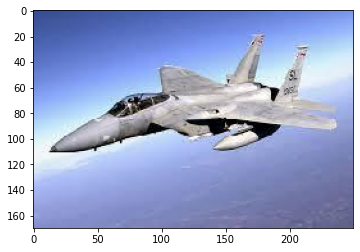

In [ ]:
img_path = "colab-data/test/f15/f15-049.jpeg"

img = image.load_img(img_path, target_size=(170, 250))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

results=model.predict(img_batch)
print(results)

plt.imshow(img)

[[1.]]


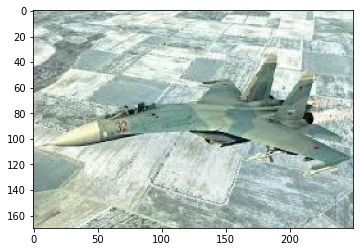

In [ ]:
img_path = "colab-data/test/su27/su27-051.jpeg"

img = image.load_img(img_path, target_size=(170, 250))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

results=model.predict(img_batch)
print(results)

plt.imshow(img)

<AxesSubplot:>

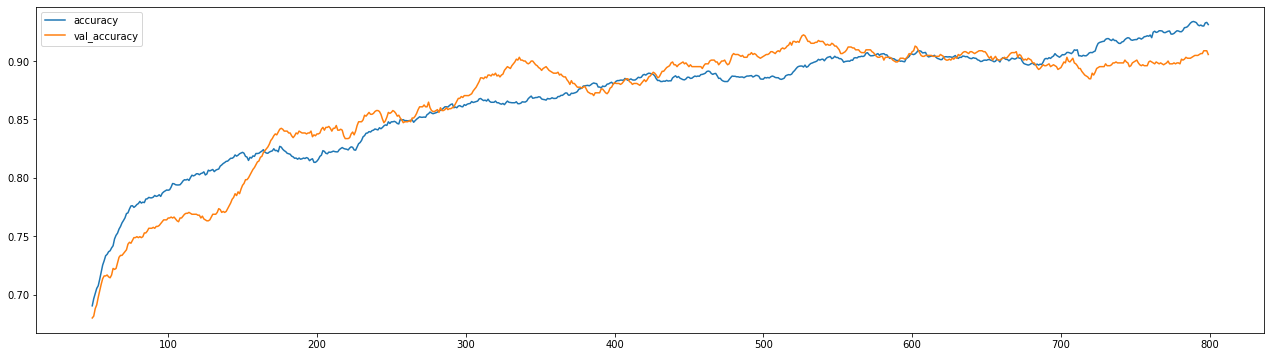

In [ ]:
pd.DataFrame(result.history)[ ["accuracy","val_accuracy"] ].rolling(50).mean().plot(figsize=(22,6))